In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

# 定义化学基团的 SMILES 表达式
smiles_groups = {
    'Alkyl (烷基)': 'CC',              # 简单的乙基烷基
    'Acyl (酰基)': 'CC(=O)',           # 乙酰基
    'Phenyl (苯环)': 'c1ccccc1',       # 苯环
    'Azacycle (氮杂环)': 'C1CCNCC1'    # 哌啶环
}

# 生成化学基团的分子对象并分别保存图片
for label, smiles in smiles_groups.items():
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))  # 设置图像大小
    img.save(f"{label}.png", dpi=(300, 300))     # 保存为300 DPI的图片


In [10]:
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES 表达式
# smiles = "c1ccccc1"  # 该结构的 SMILES 表达式
smiles = "CC(C)C[C@H](NC(=O)[C@@H](N)Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O"  # 该结构的 SMILES 表达式

# 转换为分子对象
mol = Chem.MolFromSmiles(smiles)

# 设置绘图选项，增加线宽
drawer = Draw.MolDraw2DCairo(300, 300)  # 使用Cairo格式绘制图像
drawer.drawOptions().bondLineWidth = 2  # 增加线宽
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# 保存图片为 PNG 格式
drawer.WriteDrawingText("increased_linewidth_molecule.png")


In [1]:
from kan import *
# from kan import *
from sklearn.model_selection import KFold,cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import process as data
import numpy as np
import scipy.stats.stats as st
import csv
import pandas as pd

In [2]:
# 读取sequence.txt文件，并保存序列和标签
sequences = []
labels = []
length=[]
# 打开并读取文件内容
with open('sequence.txt', 'r') as file:
    lines = file.readlines()

# 处理每两行一组的序列和标签
for i in range(0, len(lines), 2):
    label = lines[i].split('|')[1].strip()  # 取竖杠后面的标签
    sequence = lines[i + 1].strip()  # 取下一行的序列
    
    labels.append(int(label))
    sequences.append(sequence)
    length.append(len(sequence))

len(sequences),len(labels)


(740, 740)

In [3]:
# 读取sequence.txt文件，并保存序列和标签
sequences_test = []
labels_test = []
length_test=[]
# 打开并读取文件内容
with open('sequence_test.txt', 'r') as file:
    lines = file.readlines()

# 处理每两行一组的序列和标签
for i in range(0, len(lines), 2):
    label = lines[i].split('|')[1].strip()  # 取竖杠后面的标签
    sequence = lines[i + 1].strip()  # 取下一行的序列
    
    labels_test.append(int(label))
    sequences_test.append(sequence)
    length_test.append(len(sequence))

len(sequences_test),len(labels_test)


(184, 184)

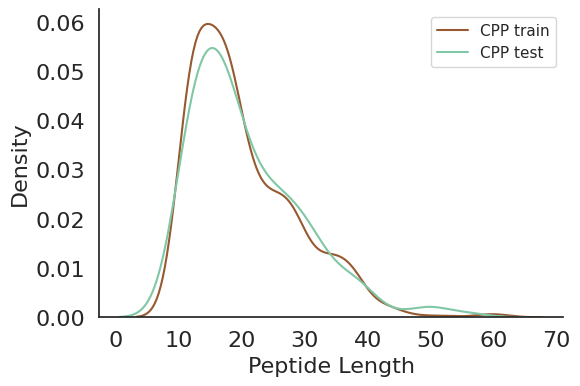

In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set(style="white")
# plt.figure(figsize=(6, 4))
# sns.kdeplot(length, fill=False, color="#965930",label='CPP train')
# sns.kdeplot(length_test, fill=False, color="#80c7a5",label='CPP test')
# # plt.title("Density Plot of Peptide Lengths")
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel("Peptide Length",fontsize=16)
# plt.ylabel("Density",fontsize=16)
# sns.despine(top=True, right=True)
# plt.legend()
# plt.show()

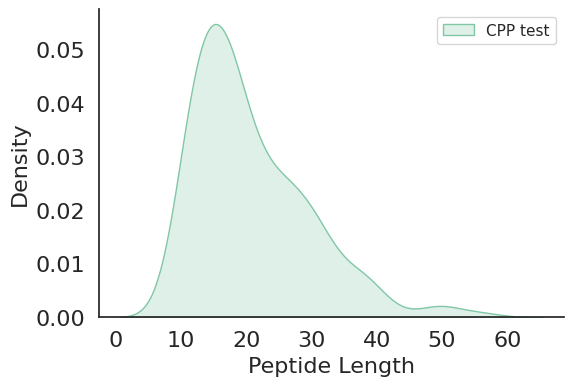

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set(style="white")
# plt.figure(figsize=(6, 4))
# sns.kdeplot(length_test, fill=True, color="#80c7a5",label='CPP test')
# # plt.title("Density Plot of Peptide Lengths")
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel("Peptide Length",fontsize=16)
# plt.ylabel("Density",fontsize=16)
# sns.despine(top=True, right=True)
# plt.legend()
# plt.show()

In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# # 假设 df 已经定义并包含 'sequence' 列
# 
# amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
# 
# # 初始化字典存储每种氨基酸的计数
# amino_acid_counts = {aa: 0 for aa in amino_acids}
# 
# # 计数每种氨基酸在所有序列中的出现次数
# for sequence in sequences:
#     for aa in sequence:
#         if aa in amino_acid_counts:
#             amino_acid_counts[aa] += 1
# 
# # 输出每种氨基酸的数量
# for aa, count in amino_acid_counts.items():
#     print(f"{aa}: {np.round(count/15062*100,2)}")

# 将字典转换为两个列表，以便绘制柱状图
# amino_acid_list = list(amino_acid_counts.keys())
# count_list = list(amino_acid_counts.values())
# 
# # 绘制柱状图
# plt.figure(figsize=(10, 6))
# plt.bar(amino_acid_list, count_list, color='skyblue')
# plt.xlabel('Amino Acids', fontsize=15)
# plt.ylabel('Count', fontsize=15)
# plt.title('Amino Acid Counts in Protein Sequences', fontsize=18)
# plt.show()


A: 6.85
C: 3.53
D: 3.52
E: 4.16
F: 3.8
G: 5.8
H: 3.95
I: 4.25
K: 8.56
L: 8.27
M: 3.42
N: 3.86
P: 4.89
Q: 4.0
R: 11.01
S: 4.73
T: 4.24
V: 3.96
W: 3.64
Y: 3.55


In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# 
# # 假设 df 已经定义并包含 'sequence' 列
# 
# amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
# 
# # 初始化字典存储每种氨基酸的计数
# amino_acid_counts = {aa: 0 for aa in amino_acids}
# 
# # 计数每种氨基酸在所有序列中的出现次数
# for sequence in sequences_test:
#     for aa in sequence:
#         if aa in amino_acid_counts:
#             amino_acid_counts[aa] += 1
# 
# # 输出每种氨基酸的数量
# for aa, count in amino_acid_counts.items():
#     print(f"{aa}: {np.round(count/3846*100,2)}")

# 将字典转换为两个列表，以便绘制柱状图
# amino_acid_list = list(amino_acid_counts.keys())
# count_list = list(amino_acid_counts.values())
# 
# # 绘制柱状图
# plt.figure(figsize=(10, 6))
# plt.bar(amino_acid_list, count_list, color='skyblue')
# plt.xlabel('Amino Acids', fontsize=15)
# plt.ylabel('Count', fontsize=15)
# plt.title('Amino Acid Counts in Protein Sequences', fontsize=18)
# plt.show()


A: 6.66
C: 3.35
D: 3.04
E: 3.35
F: 3.85
G: 5.15
H: 5.25
I: 4.37
K: 9.15
L: 8.5
M: 2.99
N: 3.95
P: 4.47
Q: 4.11
R: 11.54
S: 4.89
T: 4.03
V: 3.35
W: 4.58
Y: 3.41


In [4]:
def maccs_feature(file):
    maccs_list=[]
    with open(file,'r') as f:
        for line in f:
            maccs=list(map(int,line.strip().split()))
            # print(maccs)
            maccs_list.append(maccs)
    return maccs_list
train_file='maccs_fp.txt'
test_file='maccs_fp_test.txt'
maccs=maccs_feature(train_file)
maccs_test=maccs_feature(test_file)
len(maccs),len(maccs_test)

(740, 184)

In [5]:
def calculate_aac(protein_list):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

    # 初始化存储结果的列表
    aac_list = []

    for protein_sequence in protein_list:
        # 初始化AAC特征字典
        aac = {aa: 0 for aa in amino_acids}

        # 计算每种氨基酸在序列中的频率
        for aa in protein_sequence:
            if aa in aac:
                aac[aa] += 1

        # 将频率转换为比例
        sequence_length = len(protein_sequence)
        aac = [count / sequence_length for aa, count in aac.items()]

        # 将结果添加到列表中
        aac_list.append(aac)

    return aac_list
aac = calculate_aac(sequences)
aac_test = calculate_aac(sequences_test)
len(aac),len(aac_test)

(740, 184)

In [6]:

def aaindex(filepath):
    protein_list = []
    csv_file_path = 'aaindex1.csv'
    lag = 2
    data = []
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)

        # Skip the first cell of the first row
        for row in csv_reader:
            # Append the row with the first cell removed to the data list
            # data.append([float(value) for value in row[1:]])
            data.append(row[1:])
    data = data[1:]
    AAindex_list = [
        [float(value) if value not in ['NA', ''] else None for value in row]
        for row in data
    ]
    # NAKH900113 【200】，KRIW710101【146】， HUTJ700103【117】，ZIMJ680103【399】，TANS770104【368】，CEDJ970105【459】，QIAN880127【283】，LEVM760107【158】
    # selected_indices = [200, 146, 117, 399, 368,459,283, 158]
    # AAindex_list = [AAindex_list[i] for i in selected_indices if i < len(AAindex_list)]
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)

    autocorrelation = []
    for sequence in protein_list:
        temp = []
        for property_values in AAindex_list:
            # 将氨基酸序列转换为属性值序列
            #     property_values = np.array([property_dict[aa] for aa in sequence])
            property_values = [0 if value is None else value for value in property_values]
            # 计算属性值的平均值
            # print(property_values)
            mean_value = np.mean(property_values)
            # print(mean_value)
            # 计算Moran自相关
            n = len(sequence)
            autocorr = np.sum((property_values[:-lag] - mean_value) * (property_values[lag:] - mean_value))
            autocorr /= (n - lag)
            temp.append(autocorr)

        autocorrelation.append(temp)

    v = []
    for i in range(len(autocorrelation)):
        vtar = autocorrelation[i]
        vtarv = []
        vtar7 = 0
        vtar8 = 0
        vtar9 = 0
        s = pd.Series(vtar)
        vtar3 = np.mean(vtar)  # These 4 dimensions are relevant statistical terms
        vtar4 = st.kurtosis(vtar)
        vtar5 = np.var(vtar)
        vtar6 = st.skew(vtar)
        #for p in range(len(vtar)): # These 3 dimensions are inspired by PAFIG algorithm
        #vtar7=vtar[p]**2+vtar7
        #if vtar[p]>va:
        #vtar8=vtar[p]**2+vtar8
        #else:
        #vtar9=vtar[p]**2+vtar9
        vcf1 = []
        vcf2 = []
        for j in range(len(vtar) - 1):  #Sequence-order-correlation terms
            vcf1.append((vtar[j] - vtar[j + 1]))
        for k in range(len(vtar) - 2):
            vcf2.append((vtar[k] - vtar[k + 2]))
        vtar10 = np.mean(vcf1)
        vtar11 = np.var(vcf1)
        vtar11A = st.kurtosis(vcf1)
        vtar11B = st.skew(vcf1)
        vtar12 = np.mean(vcf2)
        vtar13 = np.var(vcf2)
        vtar13A = st.kurtosis(vcf2)
        vtar13B = st.skew(vcf2)
        vtarv.append(vtar3)
        vtarv.append(vtar4)
        vtarv.append(vtar5)
        vtarv.append(vtar6)
        #vtarv.append(vtar7/len(vtar))
        #vtarv.append(vtar8/len(vtar))
        #vtarv.append(vtar9/len(vtar))
        vtarv.append(vtar10)
        vtarv.append(vtar11)
        vtarv.append(vtar11A)
        vtarv.append(vtar11B)
        vtarv.append(vtar12)
        vtarv.append(vtar13)
        vtarv.append(vtar13A)
        vtarv.append(vtar13B)
        v.append(vtarv)
    return v

train_file='sequence.txt'
test_file='sequence_test.txt'
AC = aaindex(train_file)
AC = np.array(AC)  # 转换为 NumPy 数组

AC_test = aaindex(test_file)
AC_test = np.array(AC_test) 
# print(v.shape,type(v))
# 检查是否为二维数组
if len(AC.shape) == 2:
    # 对每一行进行 Z-score 标准化
    AC = (AC - np.mean(AC, axis=1, keepdims=True)) / np.std(AC, axis=1, keepdims=True)
    print(len(AC))
else:
    print("AC 不是二维数组")

if len(AC_test.shape) == 2:
    # 对每一行进行 Z-score 标准化
    AC_test = (AC_test - np.mean(AC_test, axis=1, keepdims=True)) / np.std(AC_test, axis=1, keepdims=True)
    print(len(AC_test))
else:
    print("AC_test 不是二维数组")

740
184


In [7]:
train_encodings=np.concatenate((aac,maccs,AC),axis=1)
test_encodings=np.concatenate((aac_test,maccs_test,AC_test),axis=1)

# train_encodings=np.concatenate((aac,maccs),axis=1)
# test_encodings=np.concatenate((aac_test,maccs_test),axis=1)
# # 
# train_encodings=np.concatenate((aac,AC),axis=1)
# test_encodings=np.concatenate((aac_test,AC_test),axis=1)
# 
# train_encodings=np.concatenate((maccs,AC),axis=1)
# test_encodings=np.concatenate((maccs_test,AC_test),axis=1)

train_encodings.shape,test_encodings.shape

((740, 199), (184, 199))

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(train_encodings, labels, random_state=42)
X_test, y_test = shuffle(test_encodings, labels_test, random_state=42)

from sklearn.preprocessing import StandardScaler

# 初始化 StandardScaler
scaler = StandardScaler()

# 对 X_train 进行标准化
X_train = scaler.fit_transform(X_train)

# 对 X_test 进行标准化
X_test = scaler.transform(X_test)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train).view(-1, 1)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test).view(-1, 1)
X_train = torch.tensor(X_train ,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
dataset = {}
dataset = {
    'train_input': X_train,
    'test_input': X_test,
    'train_label': y_train,
    'test_label': y_test
}
X_train.shape

/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommen

torch.Size([740, 199])

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# 模拟数据
torch.manual_seed(42)
np.random.seed(42)
# X = np.random.rand(300, 199)  # 300条数据，每条199个特征
# y = np.random.randint(0, 2, size=300)  # 每条数据对应一个二分类标签
# protein_list = np.array([f"Protein_{i}" for i in range(300)])  # 关联序列（可选）

# 数据拆分
# X_train, X_test, y_train, y_test, sequence_train, sequence_test = train_test_split(
#     X, y, protein_list, test_size=0.2, random_state=21
# )

# 转换为PyTorch张量
# X_train = torch.tensor(X_train, dtype=torch.float32)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # 转换为二维张量
# y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)

# Transformer二分类模型
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, d_model=128, nhead=4, num_layers=8):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding层
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )
        self.fc_out = nn.Linear(d_model, 1)  # 输出层
        self.sigmoid = nn.Sigmoid()  # Sigmoid激活函数

    def forward(self, x):
        x = self.embedding(x)  # Embedding (batch_size, input_dim) -> (batch_size, d_model)
        x = x.unsqueeze(1)  # 添加序列维度 (batch_size, d_model) -> (batch_size, 1, d_model)
        x = x.permute(1, 0, 2)  # 调整为 (seq_len, batch_size, d_model)
        x = self.transformer(x)  # Transformer 编码
        x = x.mean(dim=0)  # 在序列维度取平均 (batch_size, d_model)
        output = self.fc_out(x)  # 输出层 (batch_size, d_model) -> (batch_size, 1)
        return self.sigmoid(output)  # 应用Sigmoid激活函数

# 初始化模型、损失函数和优化器
model = TransformerClassifier(input_dim=199, d_model=32, nhead=4, num_layers=2)
loss_fn = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

# 训练模型
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

# 评估函数
def evaluate_model(model, X, y, dataset_name="Dataset"):
    model.eval()
    with torch.no_grad():
        y_pred = model(X).squeeze().numpy()
        y_pred_binary = (y_pred >= 0.5).astype(int)
        y_true = y.squeeze().numpy()

        acc = accuracy_score(y_true, y_pred_binary)
        auc = roc_auc_score(y_true, y_pred)
        mcc = matthews_corrcoef(y_true, y_pred_binary)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
        se = tp / (tp + fn)  # Sensitivity
        sp = tn / (tn + fp)  # Specificity

        print(f"\n=== {dataset_name} Metrics ===")
        print(f"Accuracy (ACC): {acc:.4f}")
        print(f"Area Under Curve (AUC): {auc:.4f}")
        print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
        print(f"Sensitivity (SE): {se:.4f}")
        print(f"Specificity (SP): {sp:.4f}")
        return acc, auc, mcc, se, sp

# 评估训练集和测试集
train_metrics = evaluate_model(model, X_train, y_train, dataset_name="Training Set")
test_metrics = evaluate_model(model, X_test, y_test, dataset_name="Test Set")


Epoch 1, Loss: 0.7466
Epoch 2, Loss: 0.5053
Epoch 3, Loss: 0.4182
Epoch 4, Loss: 0.3737
Epoch 5, Loss: 0.3358
Epoch 6, Loss: 0.3150
Epoch 7, Loss: 0.3065
Epoch 8, Loss: 0.2764
Epoch 9, Loss: 0.2740
Epoch 10, Loss: 0.2625
Epoch 11, Loss: 0.2443
Epoch 12, Loss: 0.2390
Epoch 13, Loss: 0.2230
Epoch 14, Loss: 0.2159
Epoch 15, Loss: 0.2099
Epoch 16, Loss: 0.1884
Epoch 17, Loss: 0.1897
Epoch 18, Loss: 0.1771
Epoch 19, Loss: 0.1734
Epoch 20, Loss: 0.1694

=== Training Set Metrics ===
Accuracy (ACC): 0.9514
Area Under Curve (AUC): 0.9880
Matthews Correlation Coefficient (MCC): 0.9027
Sensitivity (SE): 0.9514
Specificity (SP): 0.9514

=== Test Set Metrics ===
Accuracy (ACC): 0.8750
Area Under Curve (AUC): 0.9519
Matthews Correlation Coefficient (MCC): 0.7504
Sensitivity (SE): 0.8913
Specificity (SP): 0.8587


In [69]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,LayerNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# X_train = X_train.numpy()
# X_test = X_test.numpy()
# y_train = y_train.numpy()
# y_test = y_test.numpy()


# 构建Keras LSTM模型
def create_model():
    model = Sequential([
        LSTM(64, input_shape=(199, 1),return_sequences=True),  # 输入序列的长度为10，特征维度为1
        LayerNormalization(),
        Dropout(0.3),
        LSTM(64,return_sequences=True), 
        Dropout(0.2),
        LSTM(32), 
        LayerNormalization(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # 输出层，使用sigmoid激活函数进行二分类
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 包装Keras模型为scikit-learn的分类器
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=1)

# 训练模型
model.fit(X_train, y_train)
print('train------------------')
# y_pred_tra = model.predict(X_train)
y_proba = model.predict_proba(X_train)[:, 1]  # 获取预测概率，用于AUC计算
y_pred_tra = (model.predict_proba(X_train)[:, 1] > 0.5).astype(int)

# 计算指标
accuracy = accuracy_score(y_train, y_pred_tra)
mcc = matthews_corrcoef(y_train, y_pred_tra)
auc_score = roc_auc_score(y_train, y_proba)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_tra).ravel()
sp = tn / (tn + fp) if (tn + fp) > 0 else 0
sn = tp / (tp + fn) if (tp + fn) > 0 else 0

# 打印指标
print(f"Accuracy: {accuracy:.4f}")
print(f"SP: {sp:.4f}, SN: {sn:.4f}, MCC: {mcc:.4f}, ACC: {accuracy:.4f}, AUC(test): {auc_score:.4f}")



print('test------------------')

# y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # 获取预测概率，用于AUC计算
y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# 计算指标
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sp = tn / (tn + fp) if (tn + fp) > 0 else 0
sn = tp / (tp + fn) if (tp + fn) > 0 else 0

# 打印指标
print(f"Accuracy: {accuracy:.4f}")
print(f"SP: {sp:.4f}, SN: {sn:.4f}, MCC: {mcc:.4f}, ACC: {accuracy:.4f}, AUC(test): {auc_score:.4f}")

# 计算特异性 (Specificity) 和 敏感性 (Sensitivity)



/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
12/12 [==============================] - 7s 272ms/step - loss: 0.6051 - accuracy: 0.6405
Epoch 2/20
12/12 [==============================] - 3s 268ms/step - loss: 0.5924 - accuracy: 0.6797
Epoch 3/20
12/12 [==============================] - 3s 261ms/step - loss: 0.5692 - accuracy: 0.7027
Epoch 4/20
12/12 [==============================] - 3s 263ms/step - loss: 0.5718 - accuracy: 0.7135
Epoch 5/20
12/12 [==============================] - 3s 261ms/step - loss: 0.5630 - accuracy: 0.6973
Epoch 6/20
12/12 [==============================] - 3s 260ms/step - loss: 0.5604 - accuracy: 0.7014
Epoch 7/20
12/12 [==============================] - 3s 263ms/step - loss: 0.5513 - accuracy: 0.7108
Epoch 8/20
12/12 [==============================] - 3s 265ms/step - loss: 0.5556 - accuracy: 0.7122
Epoch 9/20
12/12 [==============================] - 3s 262ms/step - loss: 0.5551 - accuracy: 0.7162
Epoch 10/20
12/12 [==============================] - 3s 259ms/step - loss: 0.5436 - accuracy: 0.7216

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, matthews_corrcoef
import numpy as np
np.random.seed(21)
torch.manual_seed(21)

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, num_classes=2):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding层
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # 输出层

    def forward(self, x):
        # x形状: (batch_size, input_dim)
        x = self.embedding(x)  # Embedding (batch_size, input_dim) -> (batch_size, d_model)
        x = x.unsqueeze(1)  # 添加序列维度 (batch_size, d_model) -> (batch_size, 1, d_model)
        x = x.permute(1, 0, 2)  # 转换为 (seq_len, batch_size, d_model)
        x = self.transformer(x)  # Transformer 编码
        x = x.mean(dim=0)  # 对序列维度取平均 (batch_size, d_model)
        output = self.fc(x)  # 输出层 (batch_size, d_model) -> (batch_size, num_classes)
        return output
# 初始化模型
input_dim = 199
num_classes = 2
model = TransformerClassifier(input_dim=input_dim, num_classes=num_classes)

# 损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 训练模型
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)  # 前向传播
    loss = loss_fn(y_pred, y_train.long())  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")
def evaluate_model(model, X, y, dataset_name="Dataset"):
    model.eval()
    with torch.no_grad():
        y_logits = model(X)
        y_pred_prob = torch.softmax(y_logits, dim=1)[:, 1].numpy()  # 获取正类概率
        y_pred = y_logits.argmax(dim=1).numpy()  # 获取预测标签
        y_true = y.numpy()

        # 计算 AUC
        auc = roc_auc_score(y_true, y_pred_prob)

        # 计算 ACC
        acc = accuracy_score(y_true, y_pred)

        # 计算混淆矩阵
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # 计算 SN (敏感性) 和 SP (特异性)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0  # 敏感性
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0  # 特异性

        # 计算 MCC
        mcc = matthews_corrcoef(y_true, y_pred)

        print(f"\n=== {dataset_name} Metrics ===")
        print(f"AUC: {auc:.4f}")
        print(f"Accuracy (ACC): {acc:.4f}")
        print(f"Sensitivity (SN): {sn:.4f}")
        print(f"Specificity (SP): {sp:.4f}")
        print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

        return auc, acc, sn, sp, mcc

# 评估训练集和测试集
train_metrics = evaluate_model(model, X_train, y_train, dataset_name="Training Set")
test_metrics = evaluate_model(model, X_test, y_test, dataset_name="Test Set")




In [15]:
y_test[0],y_train[0]

(tensor([0.]), tensor([0.]))

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                            | 0/5 [00:00<?, ?it/s]

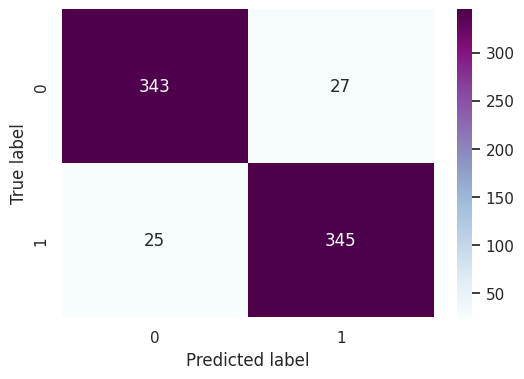

 SP: 0.9270, SN: 0.9324, ,  MCC: 0.8595, ACC: 0.9297, AUC(train): 0.9773 


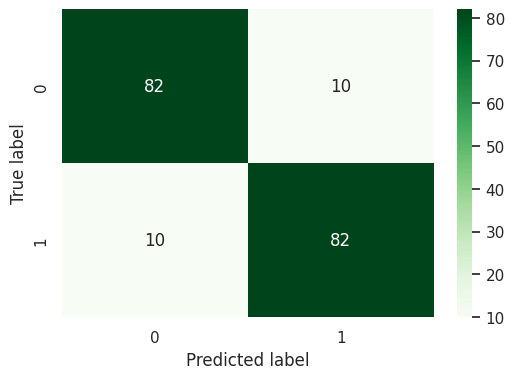

| train_loss: 2.42e-01 | test_loss: 2.94e-01 | reg: 0.00e+00 | :  20%|▏| 1/5 [00:04<00:16,  4.09s/it

 SP: 0.8913, SN: 0.8913, ,  MCC: 0.7826, ACC: 0.8913, AUC(test): 0.9559 


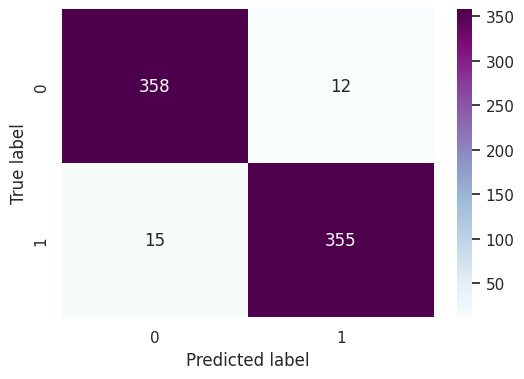

 SP: 0.9676, SN: 0.9595, ,  MCC: 0.9271, ACC: 0.9635, AUC(train): 0.9936 


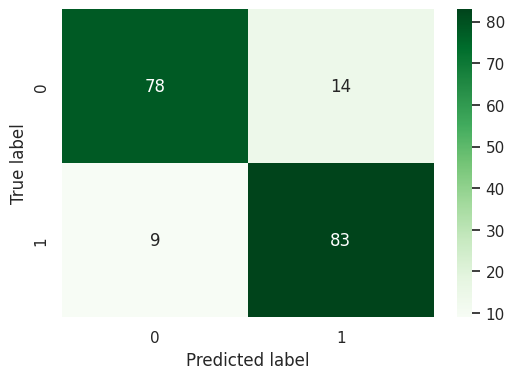

 SP: 0.8478, SN: 0.9022, ,  MCC: 0.7511, ACC: 0.8750, AUC(test): 0.9533 


| train_loss: 1.92e-01 | test_loss: 3.03e-01 | reg: 0.00e+00 | :  40%|▍| 2/5 [00:07<00:10,  3.50s/it

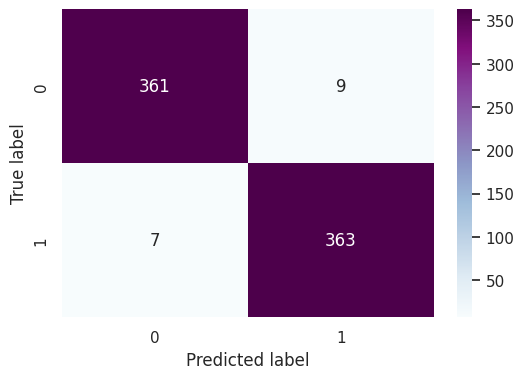

 SP: 0.9757, SN: 0.9811, ,  MCC: 0.9568, ACC: 0.9784, AUC(train): 0.9983 


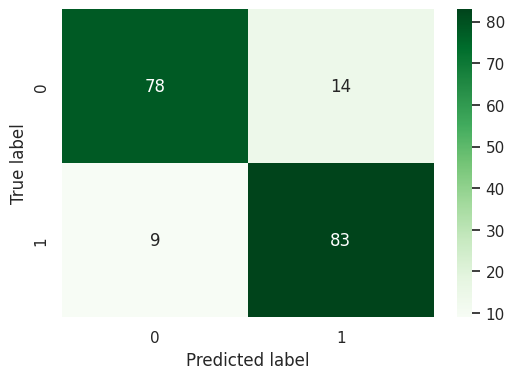

 SP: 0.8478, SN: 0.9022, ,  MCC: 0.7511, ACC: 0.8750, AUC(test): 0.9449 


| train_loss: 1.60e-01 | test_loss: 3.12e-01 | reg: 0.00e+00 | :  60%|▌| 3/5 [00:10<00:06,  3.39s/it

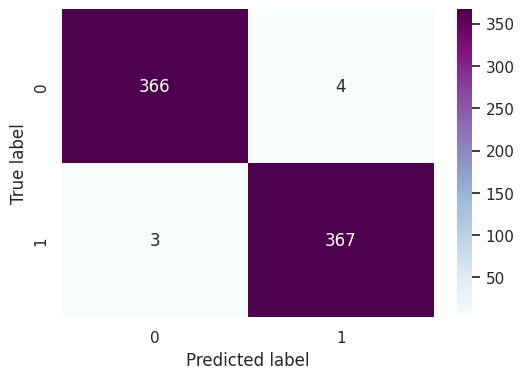

 SP: 0.9892, SN: 0.9919, ,  MCC: 0.9811, ACC: 0.9905, AUC(train): 0.9996 


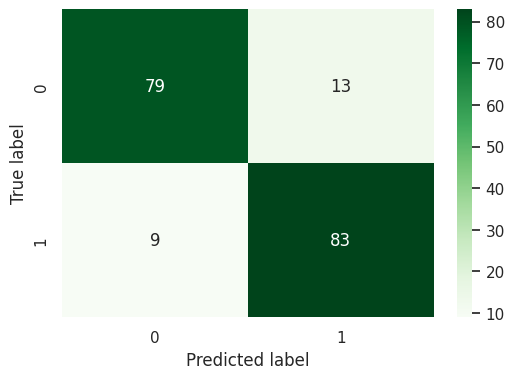

| train_loss: 1.40e-01 | test_loss: 3.01e-01 | reg: 0.00e+00 | :  80%|▊| 4/5 [00:13<00:03,  3.26s/it

 SP: 0.8587, SN: 0.9022, ,  MCC: 0.7616, ACC: 0.8804, AUC(test): 0.9451 
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_act

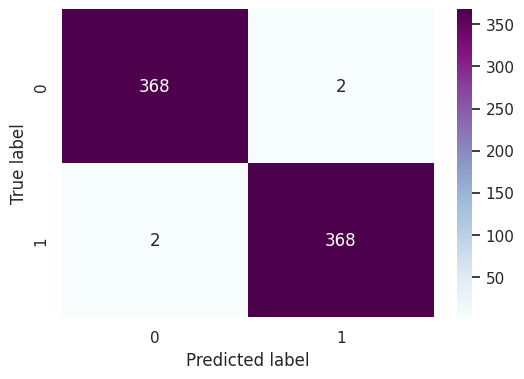

 SP: 0.9946, SN: 0.9946, ,  MCC: 0.9892, ACC: 0.9946, AUC(train): 0.9999 


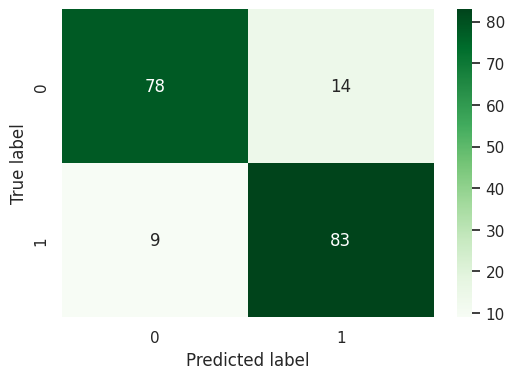

| train_loss: 1.18e-01 | test_loss: 3.13e-01 | reg: 6.71e+01 | : 100%|█| 5/5 [00:18<00:00,  3.73s/it

 SP: 0.8478, SN: 0.9022, ,  MCC: 0.7511, ACC: 0.8750, AUC(test): 0.9412 
saving model version 0.1
0.9945945739746094 0.875


In [16]:
model = KAN(width=[199,5,1], grid=6, k=6, seed=42) 
#初始化完模型就可以可视化原数据
# model(dataset['train_input'])
# model.plot(beta=100)
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from itertools import count


def train_acc():
    count_train = count(start=1, step=1) 
    pred=model(X_train)
    
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
        cm = confusion_matrix(y_train, pred_labels)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", cbar=True)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        # plt.savefig(str(next(count_train))+'_train_cla.png',dpi=300)
        plt.show()
    print(f" SP: {sp:.4f}, SN: {sn:.4f}, ,  MCC: {mcc:.4f}, ACC: {acc:.4f}, AUC(train): {auc:.4f} ")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    count_test = count(start=1, step=1) 
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
        cm = confusion_matrix(y_test, pred_labels)

        # Plot heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=True)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        # plt.savefig(str(next(count_test))+'_test_cla.png',dpi=300)
        plt.show()
    print(f" SP: {sp:.4f}, SN: {sn:.4f}, ,  MCC: {mcc:.4f}, ACC: {acc:.4f}, AUC(test): {auc:.4f} ")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc)) ,lamb=0.001 lamb_entropy=4.,lamb=0.1,lamb_l1=2.5,
# lamb=0.005 train/fit   epoch30


image_folder='video_img_cla'
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc), save_fig=False, img_folder=image_folder);
print(results['train_acc'][-1], results['test_acc'][-1])

In [17]:
model.feature_score

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


tensor([0.1451, 0.1648, 0.1644, 0.2146, 0.0918, 0.0456, 0.2496, 0.1014, 0.3307,
        0.2549, 0.1880, 0.1516, 0.1690, 0.1063, 0.4688, 0.1566, 0.1496, 0.1376,
        0.1481, 0.1566, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0239, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0399, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0421, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0626, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0580, 0.0655, 0.0000, 0.0501, 0.0203,
        0.0000, 0.0456, 0.0000, 0.0071, 0.0167, 0.0000, 0.0515, 0.0590, 0.0000,
        0.1251, 0.0297, 0.0000, 0.0000, 

In [18]:
top_values, top_indices = torch.topk(model.feature_score, 10)

# 输出结果
print("Top 10 feature scores:", top_values)
print("Indices of top 10 feature scores:", top_indices)

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
Top 10 feature scores: tensor([0.4688, 0.3307, 0.2549, 0.2496, 0.2146, 0.1880, 0.1690, 0.1648, 0.1644,
        0.1566])
Indices of top 10 feature scores: tensor([14,  8,  9,  6,  3, 10, 12,  1,  2, 19])


In [19]:
import torch

# 假设 model.feature_score 是一个 Tensor
feature_scores = model.feature_score  # Tensor

# 前 20 个数据中的 top 5
top5_values_1, top5_indices_1 = torch.topk(feature_scores[:20], 5)
print("Top 5 feature scores in first 20:", top5_values_1)
print("Indices of top 5 feature scores in first 20:", top5_indices_1)

# 中间 20-187 的数据中的 top 5
top5_values_2, top5_indices_2 = torch.topk(feature_scores[20:187], 5)
top5_indices_2 += 20  # 调整索引，使其与原始数据的索引对齐
print("Top 5 feature scores in indices 20-187:", top5_values_2)
print("Indices of top 5 feature scores in indices 20-187:", top5_indices_2)

# 最后 12 个数据中的 top 5
top5_values_3, top5_indices_3 = torch.topk(feature_scores[187:], 5)
top5_indices_3 += 187  # 调整索引，使其与原始数据的索引对齐
print("Top 5 feature scores in indices 187 and beyond:", top5_values_3)
print("Indices of top 5 feature scores in indices 187 and beyond:", top5_indices_3)


l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
Top 5 feature scores in first 20: tensor([0.4688, 0.3307, 0.2549, 0.2496, 0.2146])
Indices of top 5 feature scores in first 20: tensor([14,  8,  9,  6,  3])
Top 5 feature scores in indices 20-187: tensor([0.1311, 0.1251, 0.1225, 0.1193, 0.0931])
Indices of top 5 feature scores in indices 20-187: tensor([129, 108, 148, 128, 140])
Top 5 feature scores in indices 187 and beyond: tensor([0.1049, 0.0893, 0.0770, 0.0523, 0.0450])
Indices of top 5 feature scores in indices 187 and beyond: tensor([193, 188, 197, 196, 192])


In [20]:
import numpy as np
import matplotlib.pyplot as plt

n_var = 199
feature_scores = model.feature_score.cpu().detach().numpy()
x_values = np.arange(n_var) + 1

model.feature_score

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


tensor([0.1451, 0.1648, 0.1644, 0.2146, 0.0918, 0.0456, 0.2496, 0.1014, 0.3307,
        0.2549, 0.1880, 0.1516, 0.1690, 0.1063, 0.4688, 0.1566, 0.1496, 0.1376,
        0.1481, 0.1566, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0239, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0399, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0421, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0626, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0580, 0.0655, 0.0000, 0.0501, 0.0203,
        0.0000, 0.0456, 0.0000, 0.0071, 0.0167, 0.0000, 0.0515, 0.0590, 0.0000,
        0.1251, 0.0297, 0.0000, 0.0000, 

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


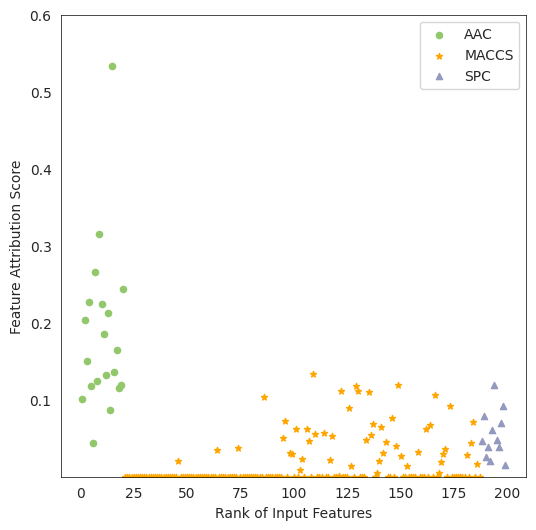

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

n_var = 199
feature_scores = model.feature_score.cpu().detach().numpy()
x_values = np.arange(n_var) + 1

# 前20个
plt.figure(figsize=(6, 6))
plt.grid(False)
plt.scatter(x_values[:20], feature_scores[:20], color='#92c86b', label='AAC',s=20)
# 中间167个
plt.scatter(x_values[20:187], feature_scores[20:187], color='orange', label='MACCS',s=20, marker='*')
# 最后12个
plt.scatter(x_values[187:], feature_scores[187:], color='#9499c0', marker='^', label='SPC', s=20)
# 设置坐标轴为对数刻度
ax = plt.gca()  # 获取当前坐标轴
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)

# 添加标签和图例
plt.xlabel('Rank of Input Features')
plt.ylabel('Feature Attribution Score')
plt.legend()
plt.ylim(0.0001, 0.6)
plt.savefig('fe1_cla.png',dpi=300)
# 显示图表 , fontsize=12
plt.show()




l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


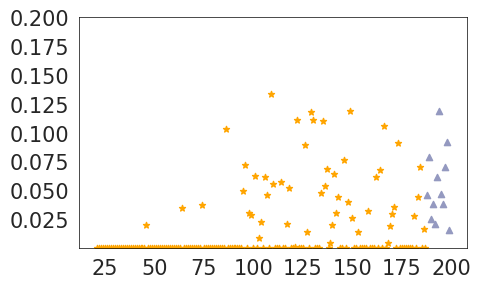

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

n_var = 199
feature_scores = model.feature_score.cpu().detach().numpy()
x_values = np.arange(n_var) + 1

# 前20个
plt.figure(figsize=(5, 3))
plt.grid(False)
# plt.scatter(x_values[:20], feature_scores[:20], color='#92c86b', label='AAC',s=20)
# 中间167个
plt.scatter(x_values[20:187], feature_scores[20:187], color='orange', label='MACCS',s=20, marker='*')
# 最后12个
plt.scatter(x_values[187:], feature_scores[187:], color='#9499c0', marker='^', label='SPC', s=20)
# 设置坐标轴为对数刻度
ax = plt.gca()  # 获取当前坐标轴
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
# 添加标签和图例
# plt.xlabel('Rank of Input Features')
# plt.ylabel('Feature Attribution Score')
# plt.legend()
plt.ylim(0.0001, 0.2)
plt.xticks(fontsize=15)  # x 轴刻度字体大小
plt.yticks(fontsize=15)  #
plt.savefig('fe2_cla.png',dpi=300)
# 显示图表 , fontsize=12
plt.show()




In [21]:
lib = ['x','x^2','x^3','x^4','x^5','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]

fixing (0,0,0) with x, r2=0.9433034062385559, c=1
fixing (0,0,1) with sin, r2=0.9991556406021118, c=2
fixing (0,0,2) with x, r2=0.9590933918952942, c=1
fixing (0,0,3) with x, r2=0.9051862359046936, c=1
fixing (0,0,4) with x, r2=0.950456976890564, c=1
fixing (0,1,0) with x, r2=0.6351367235183716, c=1
fixing (0,1,1) with x, r2=0.7765520215034485, c=1
fixing (0,1,2) with sin, r2=0.9955899119377136, c=2
fixing (0,1,3) with x, r2=0.5776570439338684, c=1
fixing (0,1,4) with x, r2=0.8061912059783936, c=1
fixing (0,2,0) with sin, r2=0.9998387098312378, c=2
fixing (0,2,1) with sin, r2=0.9999986886978149, c=2
fixing (0,2,2) with sin, r2=0.9999571442604065, c=2
fixing (0,2,3) with sin, r2=0.9999889731407166, c=2
fixing (0,2,4) with sin, r2=0.9999962449073792, c=2
fixing (0,3,0) with sin, r2=0.9998359084129333, c=2
fixing (0,3,1) with sin, r2=0.9990509152412415, c=2
fixing (0,3,2) with x^2, r2=0.9982383251190186, c=2
fixing (0,3,3) with sin, r2=0.9999212622642517, c=2
fixing (0,3,4) with sin, r2=0

In [18]:
torch.save(model.state_dict(), 'Cla_model_weights_KAN.pth')

In [19]:
# model.save_ckpt("KAN_cla","/tmp/pycharm_project_763/result")
# model=KAN.load_ckpt("KAN_cla","/tmp/pycharm_project_763/result")

In [ ]:
# Top 5 feature scores in first 20: tensor([0.5073, 0.2429, 0.2413, 0.2373, 0.1663])
# Indices of top 5 feature scores in first 20: tensor([14,  9,  8,  3, 11])
# Top 5 feature scores in indices 20-187: tensor([0.1142, 0.1105, 0.0983, 0.0912, 0.0861])
# Indices of top 5 feature scores in indices 20-187: tensor([108, 100, 129, 163, 113])
# Top 5 feature scores in indices 187 and beyond: tensor([0.1112, 0.0986, 0.0725, 0.0693, 0.0392])
# Indices of top 5 feature scores in indices 187 and beyond: tensor([193, 197, 188, 196, 194])

# Top 5 feature scores in first 20: tensor([0.4990, 0.3485, 0.2286, 0.2283, 0.2083])
# Indices of top 5 feature scores in first 20: tensor([14,  8,  9, 12,  3])
# Top 5 feature scores in indices 20-187: tensor([0.1790, 0.1392, 0.1070, 0.1047, 0.0970])
# Indices of top 5 feature scores in indices 20-187: tensor([108, 129,  85, 172, 165])
# Top 5 feature scores in indices 187 and beyond: tensor([0.1005, 0.0910, 0.0707, 0.0595, 0.0584])
# Indices of top 5 feature scores in indices 187 and beyond: tensor([193, 188, 197, 196, 192])

# Top 5 feature scores in first 20: tensor([0.5339, 0.3152, 0.2664, 0.2444, 0.2265])
# Indices of top 5 feature scores in first 20: tensor([14,  8,  6, 19,  3])
# Top 5 feature scores in indices 20-187: tensor([0.1336, 0.1189, 0.1183, 0.1115, 0.1113])
# Indices of top 5 feature scores in indices 20-187: tensor([108, 148, 128, 121, 129])
# Top 5 feature scores in indices 187 and beyond: tensor([0.1190, 0.0925, 0.0794, 0.0702, 0.0614])
# Indices of top 5 feature scores in indices 187 and beyond: tensor([193, 197, 188, 196, 192])

# Top 5 feature scores in first 20: tensor([0.5448, 0.3164, 0.2638, 0.2412, 0.2282])
# Indices of top 5 feature scores in first 20: tensor([14,  8,  6, 19,  3])
# Top 5 feature scores in indices 20-187: tensor([0.1313, 0.1246, 0.1147, 0.1126, 0.1110])
# Indices of top 5 feature scores in indices 20-187: tensor([108, 148, 128, 121, 134])
# Top 5 feature scores in indices 187 and beyond: tensor([0.1140, 0.0900, 0.0844, 0.0663, 0.0601])
# Indices of top 5 feature scores in indices 187 and beyond: tensor([193, 197, 188, 196, 192])

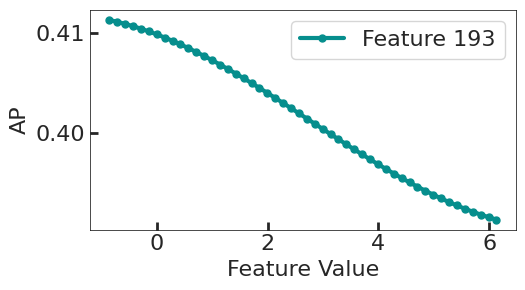

In [41]:
import seaborn as sns  # 定义部分依赖函数


def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i + 1): value if i == feature_idx else dataset['test_input'][0, i]
            for i in range(dataset['test_input'].shape[1])
        }
        # predict = float(formula.subs(subs_dict))
        from scipy.special import expit  # expit 是 Sigmoid 函数

        predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
        predict = expit(predict)  # 应用 expit 函数，转换为概率  # 使
        
        
        predictions.append(predict)
    return np.array(predictions)


# dataset 是你的数据集，formula 是你的模型公式
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp_14 = 193  # 假设选择第一个特征进行 PDP
feature_index_pdp_9 = 8 
feature_index_pdp_8 = 6
feature_index_pdp_3 = 19 
feature_index_pdp_11 = 3

feature_values_pdp_14 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_14]), max(dataset['test_input'][:, feature_index_pdp_14]), num=50)
feature_values_pdp_9 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_9]), max(dataset['test_input'][:, feature_index_pdp_9]), num=50)
feature_values_pdp_8 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_8]), max(dataset['test_input'][:, feature_index_pdp_8]), num=50)
feature_values_pdp_3 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_3]), max(dataset['test_input'][:, feature_index_pdp_3]), num=50)
feature_values_pdp_11 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_11]), max(dataset['test_input'][:, feature_index_pdp_11]), num=50)


# 计算部分依赖
predictions_pdp_14 = partial_dependence(feature_index_pdp_14, feature_values_pdp_14, formula, dataset)
# predictions_pdp_9 = partial_dependence(feature_index_pdp_9, feature_values_pdp_9, formula, dataset)
# predictions_pdp_8 = partial_dependence(feature_index_pdp_8, feature_values_pdp_8, formula, dataset)
# predictions_pdp_3 = partial_dependence(feature_index_pdp_3, feature_values_pdp_3, formula, dataset)
# predictions_pdp_11 = partial_dependence(feature_index_pdp_11, feature_values_pdp_11, formula, dataset)

# 绘制部分依赖图（PDP）# 设置Seaborn样式
# sns.set(style="whitegrid")
plt.figure(figsize=(5.5, 3))
plt.grid(False)
ax = plt.gca()  # 获取当前坐标轴
# border_width = 4  # 边框粗细大小
ax.set_xlabel('Feature Value', fontsize=16)
ax.set_ylabel('AP', fontsize=16)
# ax.spines['top'].set_linewidth(border_width)
# ax.spines['bottom'].set_linewidth(border_width)
# ax.spines['left'].set_linewidth(border_width)
# ax.spines['right'].set_linewidth(border_width)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
plt.plot(feature_values_pdp_14, predictions_pdp_14,  linestyle='-', marker='o',color='#068e8d', linewidth=3, markersize=5, label='Feature 193')
# plt.fill_between(feature_values_pdp_14, predictions_pdp_14, color='#a51c36', alpha=0.1)
# marker='o',marker='*',marker='^',
# plt.plot(feature_values_pdp_9, predictions_pdp_9,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 8')
# plt.fill_between(feature_values_pdp_9, predictions_pdp_9, color='#682487', alpha=0.1)

# plt.plot(feature_values_pdp_8, predictions_pdp_8,  linestyle='-',marker='o', color='#4485c7', linewidth=3, markersize=4, label='Feature 8')
# plt.fill_between(feature_values_pdp_8, predictions_pdp_8, color='#4485c7', alpha=0.1)

# plt.plot(feature_values_pdp_3, predictions_pdp_3,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 3')
# plt.fill_between(feature_values_pdp_3, predictions_pdp_3, color='#682487', alpha=0.1)
# 
# plt.plot(feature_values_pdp_11, predictions_pdp_11,  linestyle='-', marker='o',color='#4485c7', linewidth=3, markersize=4, label='Feature 11')
# plt.fill_between(feature_values_pdp_11, predictions_pdp_11, color='#4485c7', alpha=0.1)

   # 添加标题和轴标签，并设置字体大小
# plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.tick_params(direction='in', length=6, width=2, labelsize=16)  # 设置刻度线方向、长度和宽度
plt.tick_params(which='both')  # 显示主刻度和次刻度线
plt.tick_params(axis='both', which='both', bottom=True, left=True)
plt.tight_layout()

plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
# sns.despine(left=True, bottom=True)
plt.savefig('cla_3_1.png',dpi=300)
plt.show()

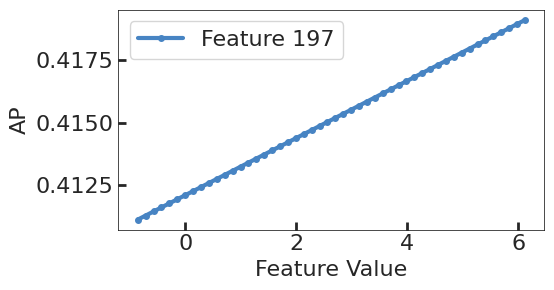

In [40]:
import seaborn as sns  # 定义部分依赖函数


def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i + 1): value if i == feature_idx else dataset['test_input'][0, i]
            for i in range(dataset['test_input'].shape[1])
        }
        # predict = float(formula.subs(subs_dict))
        from scipy.special import expit  # expit 是 Sigmoid 函数

        predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
        predict = expit(predict)  # 应用 expit 函数，转换为概率  # 使
        
        
        predictions.append(predict)
    return np.array(predictions)


# dataset 是你的数据集，formula 是你的模型公式
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp_14 = 14  # 假设选择第一个特征进行 PDP
feature_index_pdp_9 = 197 
feature_index_pdp_8 = 6
feature_index_pdp_3 = 19 
feature_index_pdp_11 = 3

feature_values_pdp_14 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_14]), max(dataset['test_input'][:, feature_index_pdp_14]), num=50)
feature_values_pdp_9 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_9]), max(dataset['test_input'][:, feature_index_pdp_9]), num=50)
feature_values_pdp_8 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_8]), max(dataset['test_input'][:, feature_index_pdp_8]), num=50)
feature_values_pdp_3 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_3]), max(dataset['test_input'][:, feature_index_pdp_3]), num=50)
feature_values_pdp_11 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_11]), max(dataset['test_input'][:, feature_index_pdp_11]), num=50)


# 计算部分依赖
# predictions_pdp_14 = partial_dependence(feature_index_pdp_14, feature_values_pdp_14, formula, dataset)
predictions_pdp_9 = partial_dependence(feature_index_pdp_9, feature_values_pdp_9, formula, dataset)
# predictions_pdp_8 = partial_dependence(feature_index_pdp_8, feature_values_pdp_8, formula, dataset)
# predictions_pdp_3 = partial_dependence(feature_index_pdp_3, feature_values_pdp_3, formula, dataset)
# predictions_pdp_11 = partial_dependence(feature_index_pdp_11, feature_values_pdp_11, formula, dataset)

# 绘制部分依赖图（PDP）# 设置Seaborn样式
# sns.set(style="whitegrid")
plt.figure(figsize=(5.5, 3))
plt.grid(False)
ax = plt.gca()  # 获取当前坐标轴
# border_width = 4  # 边框粗细大小
ax.set_xlabel('Feature Value', fontsize=16)
ax.set_ylabel('AP', fontsize=16)
# ax.spines['top'].set_linewidth(border_width)
# ax.spines['bottom'].set_linewidth(border_width)
# ax.spines['left'].set_linewidth(border_width)
# ax.spines['right'].set_linewidth(border_width)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
# plt.plot(feature_values_pdp_14, predictions_pdp_14,  linestyle='-', marker='o',color='#068e8d', linewidth=3, markersize=5, label='Feature 14')
# plt.fill_between(feature_values_pdp_14, predictions_pdp_14, color='#a51c36', alpha=0.1)
# marker='o',marker='*',marker='^',
plt.plot(feature_values_pdp_9, predictions_pdp_9,  linestyle='-',marker='o', color='#4784c3', linewidth=3, markersize=4, label='Feature 197')
# plt.fill_between(feature_values_pdp_9, predictions_pdp_9, color='#682487', alpha=0.1)

# plt.plot(feature_values_pdp_8, predictions_pdp_8,  linestyle='-',marker='o', color='#4485c7', linewidth=3, markersize=4, label='Feature 8')
# plt.fill_between(feature_values_pdp_8, predictions_pdp_8, color='#4485c7', alpha=0.1)

# plt.plot(feature_values_pdp_3, predictions_pdp_3,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 3')
# plt.fill_between(feature_values_pdp_3, predictions_pdp_3, color='#682487', alpha=0.1)
# 
# plt.plot(feature_values_pdp_11, predictions_pdp_11,  linestyle='-', marker='o',color='#4485c7', linewidth=3, markersize=4, label='Feature 11')
# plt.fill_between(feature_values_pdp_11, predictions_pdp_11, color='#4485c7', alpha=0.1)

   # 添加标题和轴标签，并设置字体大小
# plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.tick_params(direction='in', length=6, width=2, labelsize=16)  # 设置刻度线方向、长度和宽度
plt.tick_params(which='both')  # 显示主刻度和次刻度线
plt.tick_params(axis='both', which='both', bottom=True, left=True)
plt.tight_layout()

plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
# sns.despine(left=True, bottom=True)
plt.savefig('cla_3_2.png',dpi=300)
plt.show()

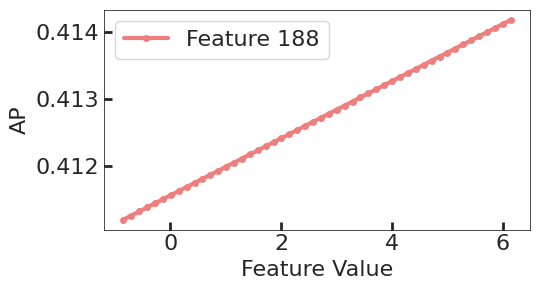

In [39]:
import seaborn as sns  # 定义部分依赖函数


def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i + 1): value if i == feature_idx else dataset['test_input'][0, i]
            for i in range(dataset['test_input'].shape[1])
        }
        # predict = float(formula.subs(subs_dict))
        from scipy.special import expit  # expit 是 Sigmoid 函数

        predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
        predict = expit(predict)  # 应用 expit 函数，转换为概率  # 使
        
        
        predictions.append(predict)
    return np.array(predictions)


# dataset 是你的数据集，formula 是你的模型公式
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp_14 = 14  # 假设选择第一个特征进行 PDP
feature_index_pdp_9 = 8 
feature_index_pdp_8 = 188
feature_index_pdp_3 = 19 
feature_index_pdp_11 = 3

feature_values_pdp_14 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_14]), max(dataset['test_input'][:, feature_index_pdp_14]), num=50)
feature_values_pdp_9 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_9]), max(dataset['test_input'][:, feature_index_pdp_9]), num=50)
feature_values_pdp_8 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_8]), max(dataset['test_input'][:, feature_index_pdp_8]), num=50)
feature_values_pdp_3 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_3]), max(dataset['test_input'][:, feature_index_pdp_3]), num=50)
feature_values_pdp_11 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_11]), max(dataset['test_input'][:, feature_index_pdp_11]), num=50)


# 计算部分依赖
# predictions_pdp_14 = partial_dependence(feature_index_pdp_14, feature_values_pdp_14, formula, dataset)
# predictions_pdp_9 = partial_dependence(feature_index_pdp_9, feature_values_pdp_9, formula, dataset)
predictions_pdp_8 = partial_dependence(feature_index_pdp_8, feature_values_pdp_8, formula, dataset)
# predictions_pdp_3 = partial_dependence(feature_index_pdp_3, feature_values_pdp_3, formula, dataset)
# predictions_pdp_11 = partial_dependence(feature_index_pdp_11, feature_values_pdp_11, formula, dataset)

# 绘制部分依赖图（PDP）# 设置Seaborn样式
# sns.set(style="whitegrid")
plt.figure(figsize=(5.5, 3))
plt.grid(False)
ax = plt.gca()  # 获取当前坐标轴
# border_width = 4  # 边框粗细大小
ax.set_xlabel('Feature Value', fontsize=16)
ax.set_ylabel('AP', fontsize=16)
# ax.spines['top'].set_linewidth(border_width)
# ax.spines['bottom'].set_linewidth(border_width)
# ax.spines['left'].set_linewidth(border_width)
# ax.spines['right'].set_linewidth(border_width)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
# plt.plot(feature_values_pdp_14, predictions_pdp_14,  linestyle='-', marker='o',color='#068e8d', linewidth=3, markersize=5, label='Feature 14')
# plt.fill_between(feature_values_pdp_14, predictions_pdp_14, color='#a51c36', alpha=0.1)
# marker='o',marker='*',marker='^',
# plt.plot(feature_values_pdp_9, predictions_pdp_9,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 9')
# plt.fill_between(feature_values_pdp_9, predictions_pdp_9, color='#682487', alpha=0.1)

plt.plot(feature_values_pdp_8, predictions_pdp_8,  linestyle='-',marker='o', color='#ee7f7e', linewidth=3, markersize=4, label='Feature 188')
# plt.fill_between(feature_values_pdp_8, predictions_pdp_8, color='#4485c7', alpha=0.1)

# plt.plot(feature_values_pdp_3, predictions_pdp_3,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 3')
# plt.fill_between(feature_values_pdp_3, predictions_pdp_3, color='#682487', alpha=0.1)
# 
# plt.plot(feature_values_pdp_11, predictions_pdp_11,  linestyle='-', marker='o',color='#4485c7', linewidth=3, markersize=4, label='Feature 11')
# plt.fill_between(feature_values_pdp_11, predictions_pdp_11, color='#4485c7', alpha=0.1)

   # 添加标题和轴标签，并设置字体大小
# plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.tick_params(direction='in', length=6, width=2, labelsize=16)  # 设置刻度线方向、长度和宽度
plt.tick_params(which='both')  # 显示主刻度和次刻度线
plt.tick_params(axis='both', which='both', bottom=True, left=True)
plt.tight_layout()

plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
# sns.despine(left=True, bottom=True)
plt.savefig('cla_3_3.png',dpi=300)
plt.show()

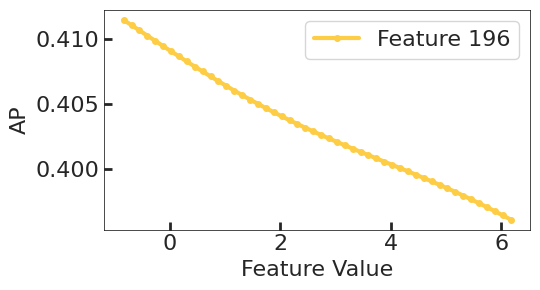

In [38]:
import seaborn as sns  # 定义部分依赖函数


def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i + 1): value if i == feature_idx else dataset['test_input'][0, i]
            for i in range(dataset['test_input'].shape[1])
        }
        # predict = float(formula.subs(subs_dict))
        from scipy.special import expit  # expit 是 Sigmoid 函数

        predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
        predict = expit(predict)  # 应用 expit 函数，转换为概率  # 使
        
        
        predictions.append(predict)
    return np.array(predictions)


# dataset 是你的数据集，formula 是你的模型公式
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp_14 = 14  # 假设选择第一个特征进行 PDP
feature_index_pdp_9 = 8 
feature_index_pdp_8 = 6
feature_index_pdp_3 = 196 
feature_index_pdp_11 = 3

feature_values_pdp_14 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_14]), max(dataset['test_input'][:, feature_index_pdp_14]), num=50)
feature_values_pdp_9 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_9]), max(dataset['test_input'][:, feature_index_pdp_9]), num=50)
feature_values_pdp_8 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_8]), max(dataset['test_input'][:, feature_index_pdp_8]), num=50)
feature_values_pdp_3 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_3]), max(dataset['test_input'][:, feature_index_pdp_3]), num=50)
feature_values_pdp_11 = np.linspace(min(dataset['test_input'][:, feature_index_pdp_11]), max(dataset['test_input'][:, feature_index_pdp_11]), num=50)


# 计算部分依赖
# predictions_pdp_14 = partial_dependence(feature_index_pdp_14, feature_values_pdp_14, formula, dataset)
# predictions_pdp_9 = partial_dependence(feature_index_pdp_9, feature_values_pdp_9, formula, dataset)
# predictions_pdp_8 = partial_dependence(feature_index_pdp_8, feature_values_pdp_8, formula, dataset)
predictions_pdp_3 = partial_dependence(feature_index_pdp_3, feature_values_pdp_3, formula, dataset)
# predictions_pdp_11 = partial_dependence(feature_index_pdp_11, feature_values_pdp_11, formula, dataset)

# 绘制部分依赖图（PDP）# 设置Seaborn样式
# sns.set(style="whitegrid")
plt.figure(figsize=(5.5, 3))
plt.grid(False)
ax = plt.gca()  # 获取当前坐标轴
# border_width = 4  # 边框粗细大小
ax.set_xlabel('Feature Value', fontsize=16)
ax.set_ylabel('AP', fontsize=16)
# ax.spines['top'].set_linewidth(border_width)
# ax.spines['bottom'].set_linewidth(border_width)
# ax.spines['left'].set_linewidth(border_width)
# ax.spines['right'].set_linewidth(border_width)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
# plt.plot(feature_values_pdp_14, predictions_pdp_14,  linestyle='-', marker='o',color='#068e8d', linewidth=3, markersize=5, label='Feature 14')
# plt.fill_between(feature_values_pdp_14, predictions_pdp_14, color='#a51c36', alpha=0.1)
# marker='o',marker='*',marker='^',
# plt.plot(feature_values_pdp_9, predictions_pdp_9,  linestyle='-',marker='o', color='#682487', linewidth=3, markersize=4, label='Feature 9')
# plt.fill_between(feature_values_pdp_9, predictions_pdp_9, color='#682487', alpha=0.1)

# plt.plot(feature_values_pdp_8, predictions_pdp_8,  linestyle='-',marker='o', color='#4485c7', linewidth=3, markersize=4, label='Feature 8')
# plt.fill_between(feature_values_pdp_8, predictions_pdp_8, color='#4485c7', alpha=0.1)

plt.plot(feature_values_pdp_3, predictions_pdp_3,  linestyle='-',marker='o', color='#fecd46', linewidth=3, markersize=4, label='Feature 196')
# plt.fill_between(feature_values_pdp_3, predictions_pdp_3, color='#682487', alpha=0.1)
# 
# plt.plot(feature_values_pdp_11, predictions_pdp_11,  linestyle='-', marker='o',color='#4485c7', linewidth=3, markersize=4, label='Feature 11')
# plt.fill_between(feature_values_pdp_11, predictions_pdp_11, color='#4485c7', alpha=0.1)

   # 添加标题和轴标签，并设置字体大小
# plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.tick_params(direction='in', length=6, width=2, labelsize=16)  # 设置刻度线方向、长度和宽度
plt.tick_params(which='both')  # 显示主刻度和次刻度线
plt.tick_params(axis='both', which='both', bottom=True, left=True)
plt.tight_layout()

plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
# sns.despine(left=True, bottom=True)
plt.savefig('cla_3_4.png',dpi=300)
plt.show()

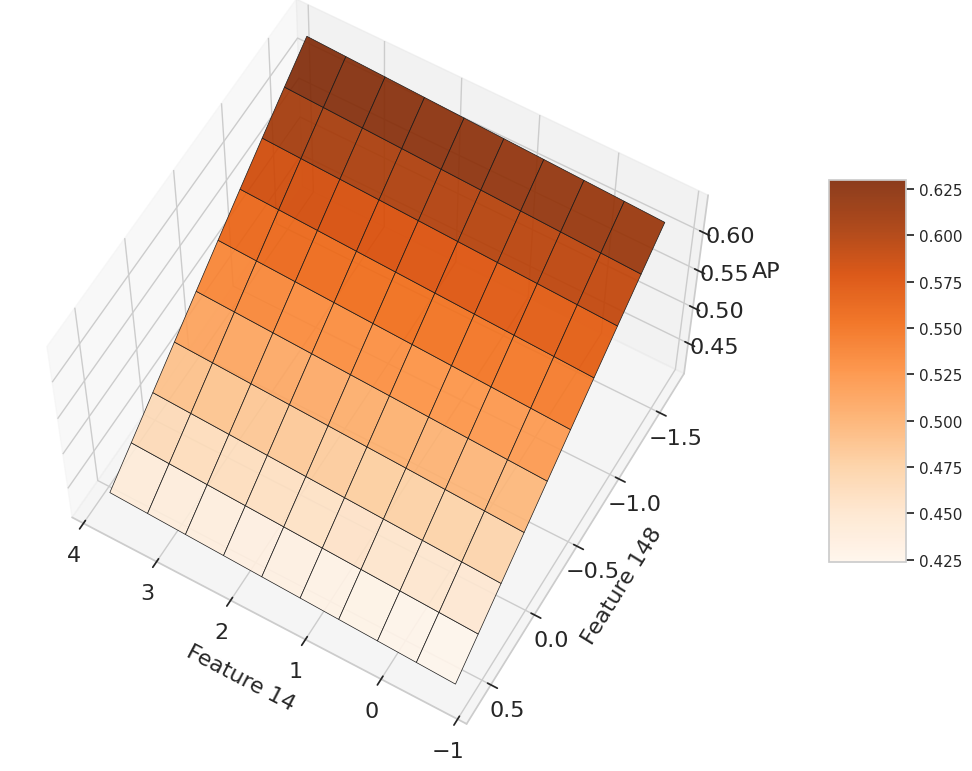

In [42]:
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k + 1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['test_input'][0, k]
                for k in range(dataset['test_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            
            from scipy.special import expit  # expit 是 Sigmoid 函数

            # predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
            predict = expit(predict) 
            predictions[i, j] = predict
    return predictions  # 选择要绘制二维部分依赖图的特征索引和范围


feature_index1 = 14  # 第一个特征索引
feature_index2 = 148  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['test_input'][:, feature_index1]), max(dataset['test_input'][:, feature_index1]), num=10)
feature_values2 = np.linspace(min(dataset['test_input'][:, feature_index2]), max(dataset['test_input'][:, feature_index2]), num=10)  # 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)  # 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='Oranges', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=16, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=16, labelpad=10)
ax.set_zlabel('AP', fontsize=16, labelpad=10)
# ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)  # 设置视角  Greens
ax.view_init(elev=60, azim=120)
plt.tight_layout()
plt.grid(False)
plt.tight_layout()
plt.savefig('Reg_2D_14_148.png',dpi=300)
plt.show()

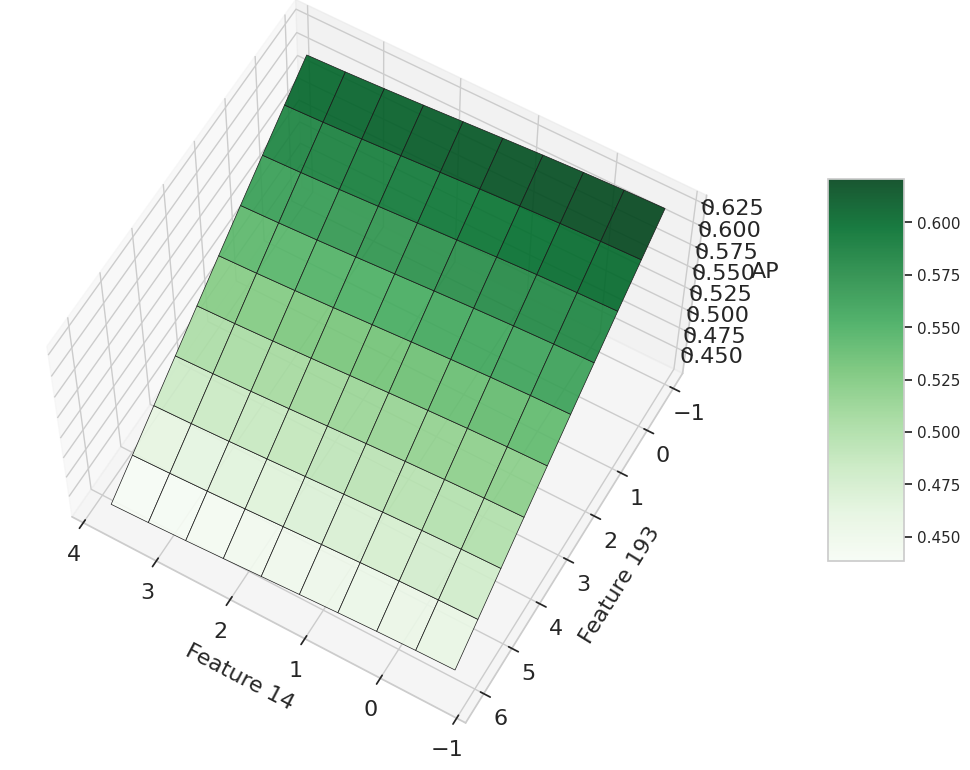

In [23]:
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k + 1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['test_input'][0, k]
                for k in range(dataset['test_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            
            from scipy.special import expit  # expit 是 Sigmoid 函数

            # predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
            predict = expit(predict) 
            predictions[i, j] = predict
    return predictions  # 选择要绘制二维部分依赖图的特征索引和范围


feature_index1 = 14  # 第一个特征索引
feature_index2 = 193  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['test_input'][:, feature_index1]), max(dataset['test_input'][:, feature_index1]), num=10)
feature_values2 = np.linspace(min(dataset['test_input'][:, feature_index2]), max(dataset['test_input'][:, feature_index2]), num=10)  # 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)  # 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='Greens', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=16, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=16, labelpad=10)
ax.set_zlabel('AP', fontsize=16, labelpad=10)
# ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)  # 设置视角  Greens
ax.view_init(elev=60, azim=120)
plt.tight_layout()
plt.grid(False)
plt.savefig('Reg_2D_14_193.png',dpi=300)
plt.show()

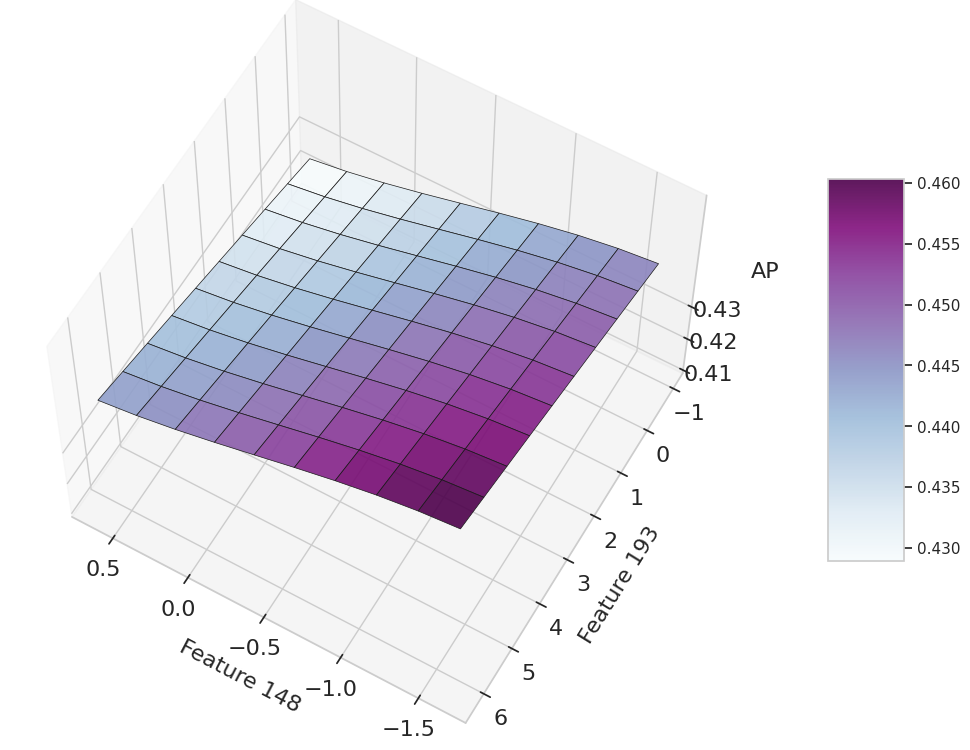

In [24]:
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k + 1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['test_input'][0, k]
                for k in range(dataset['test_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            
            from scipy.special import expit  # expit 是 Sigmoid 函数

            # predict = float(formula.subs(subs_dict))  # 将符号表达式转换为浮点数
            predict = expit(predict) 
            predictions[i, j] = predict
    return predictions  # 选择要绘制二维部分依赖图的特征索引和范围


feature_index1 = 148  # 第一个特征索引
feature_index2 = 193  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['test_input'][:, feature_index1]), max(dataset['test_input'][:, feature_index1]), num=10)
feature_values2 = np.linspace(min(dataset['test_input'][:, feature_index2]), max(dataset['test_input'][:, feature_index2]), num=10)  # 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)  # 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='BuPu', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=16, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=16, labelpad=10)
ax.set_zlabel('AP', fontsize=16, labelpad=10)
# ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)  # 设置视角  Greens
ax.view_init(elev=60, azim=120)
ax.set_zticks(np.arange(0.41, 0.43, 0.01))
plt.tight_layout()
plt.grid(False)
plt.savefig('Reg_2D_148_193.png',dpi=300)
plt.show()

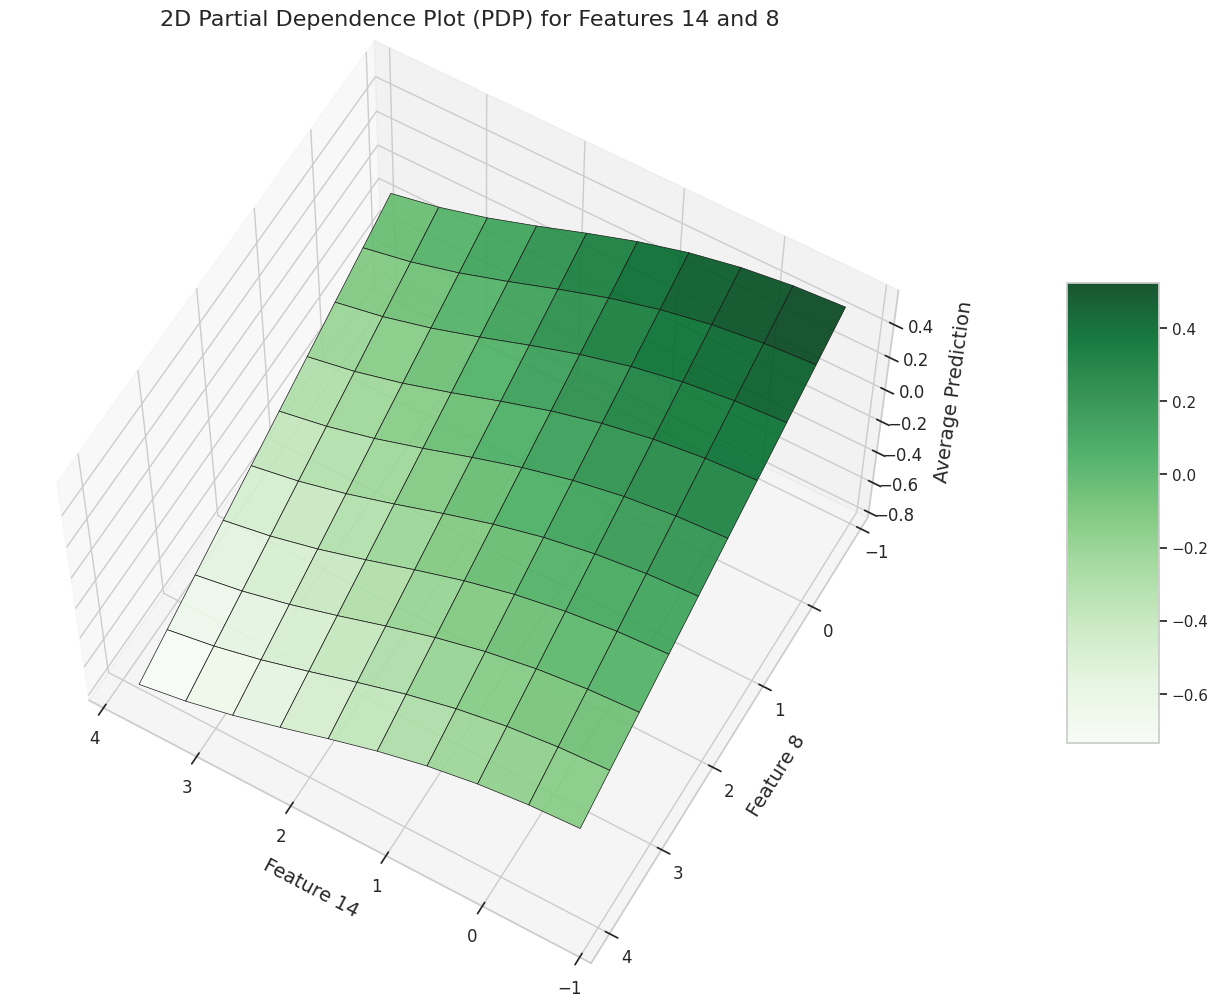

In [52]:
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k + 1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['test_input'][0, k]
                for k in range(dataset['test_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            predictions[i, j] = predict
    return predictions  # 选择要绘制二维部分依赖图的特征索引和范围


feature_index1 = 14  # 第一个特征索引
feature_index2 = 8  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['test_input'][:, feature_index1]), max(dataset['test_input'][:, feature_index1]), num=10)
feature_values2 = np.linspace(min(dataset['test_input'][:, feature_index2]), max(dataset['test_input'][:, feature_index2]), num=10)  # 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)  # 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')  # 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='Greens', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=14, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=14, labelpad=10)
ax.set_zlabel('Average Prediction', fontsize=14, labelpad=10)
ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)  # 设置视角
ax.view_init(elev=60, azim=120)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# input_vars = [r'$x_{'+str(i)+'}$' for i in range(n_var)]
n_var = 199
plt.scatter(np.arange(n_var) + 1, model.feature_score.cpu().detach().numpy())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

In [23]:
from hyperopt import hp
space = {
    # 'width': [
    #     # hp.quniform('width1', 50, 250, 1),  # 第一层宽度，范围50到250
    #     hp.quniform('width2', 2, 100, 1),   # 第二层宽度，范围2到100
    #     hp.quniform('width3', 1, 10, 1)     # 第三层宽度，范围1到10
    # ],
    'width2': hp.quniform('width2', 2, 7, 1),
    'width3': hp.quniform('width3', 2, 7, 1),
    # grid值可以在一个合理的范围内调整，比如1到20
    'grid': hp.quniform('grid', 2, 7, 1),
    # k的取值可以在2到20之间调整
    'k': hp.quniform('k', 2, 7, 1),
    # seed通常不需要优化，但如果需要固定，也可以保持不变
    # 'seed': 42  # 固定种子
}

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


tensor([0.1818, 0.1969, 0.1179, 0.2393, 0.0775, 0.0643, 0.1784, 0.0673, 0.2923,
        0.2129, 0.1274, 0.1469, 0.2323, 0.0702, 0.4571, 0.1446, 0.0798, 0.1257,
        0.0475, 0.1577, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0204, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0328, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0274, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0554, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0480, 0.0343, 0.0000, 0.0317, 0.0216,
        0.0000, 0.1106, 0.0000, 0.0044, 0.0323, 0.0000, 0.0368, 0.0597, 0.0000,
        0.1092, 0.0481, 0.0000, 0.0000, 

l: 2
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2
l: 1
Length of self.edge_actscale: 2
Length of self.subnode_actscale: 2


Text(0, 0.5, 'feature attribution score')

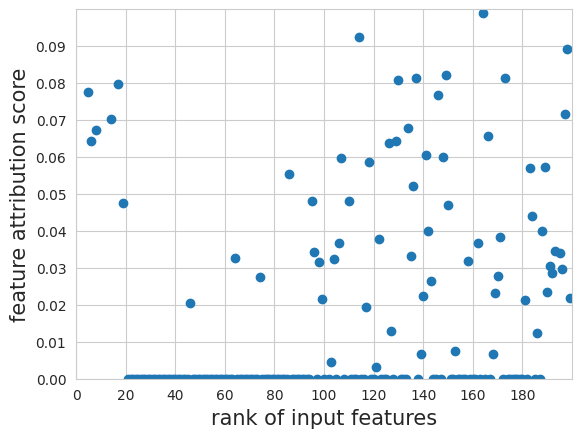

In [42]:
def objective(params):

    from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
    def train_acc():
        pred=model(X_train)
        with torch.no_grad():
            pred_labels = (pred > 0.5).float()
            auc = roc_auc_score(y_train.cpu(), pred.cpu())

        # 混淆矩阵计算
            tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

            # Specificity (SP)
            sp = tn / (tn + fp) if (tn + fp) > 0 else 0

            acc = (tp + tn) / (tp + tn + fp + fn)

            # Sensitivity (SN)
            sn = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Matthews Correlation Coefficient (MCC)
            mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
        print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
        return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

    def test_acc():
        pred=model(X_test)
        with torch.no_grad():
            pred_labels = (pred > 0.5).float()
            auc = roc_auc_score(y_test.cpu(), pred.cpu())

        # 混淆矩阵计算
            tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

            # Specificity (SP)
            sp = tn / (tn + fp) if (tn + fp) > 0 else 0

            acc = (tp + tn) / (tp + tn + fp + fn)

            # Sensitivity (SN)
            sn = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Matthews Correlation Coefficient (MCC)
            mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
        print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
        return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

    # 使用传入的超参数初始化 KAN 模型
    # model = KAN(width=[199,3,1], grid=int(params['grid']), k=int(params['k']), seed=params['seed'])
    model = KAN(
        width=[199, int(params['width2']), int(params['width3']), 1],  # 固定第一个和第三个参数，优化第二个参数
        grid=int(params['grid']),
        k=int(params['k']),
        # seed=params['seed']
    )
    print("params['width2'],params['width2'],int(params['grid']),int(params['k'])",int(params['width2']),int(params['width3']),int(params['grid']),int(params['k']))
    # print("int(params['grid']),",int(params['grid']))
    # print("int(params['k'])",int(params['k']))
    # loss_fn=torch.nn.CrossEntropyLoss()
    # 使用指定的优化器、训练步数和评估指标训练模型
    # results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc));
    results = model.fit(
        dataset, 
        opt="LBFGS", 
        steps=5, 
        metrics=(train_acc, test_acc)
        # loss_fn=loss_fn
    )
    weight_train = 0.3
    weight_test = 0.7
    # accuracy_score = weight_train * results['train_acc'][-1] + weight_test * results['test_acc'][-1]
    # 
    train_accuracy=results['train_acc'][-1]
    test_accuracy=results['test_acc'][-1]
    # print('test_accuracy',test_accuracy)
    # 获取测试集准确率（results 中第二个指标是 test_acc）
    # test_accuracy = test_acc()

    # 返回负的测试集准确率，优化时最大化准确率
    return {
        'loss': -test_accuracy,  # 返回负的测试准确率用于最小化
        'test_acc': test_accuracy,  # 测试集准确率
        'train_acc': train_accuracy,  # 训练集准确率
        'status': 'ok'  # hyperopt 要求有 status 字段
    } # 取负数使其最小化负准确率



In [16]:
from hyperopt import fmin, tpe, Trials, space_eval

# 定义 Trials 对象来跟踪训练过程
trials = Trials()

# 调用 fmin 进行优化
best = fmin(
    fn=objective,          # 目标函数
    space=space,           # 搜索空间
    algo=tpe.suggest,      # 使用TPE算法
    max_evals=20,          # 最大评估次数
    trials=trials          # 记录每次的评估
)

# 计算最佳参数
best_params = space_eval(space, best)

# 从 trials 中获取最好的评估结果
best_trial = min(trials.results, key=lambda x: x['loss'])  # 'loss' 是 objective 返回值

# 计算最佳准确率
best_accuracy = -best_trial['loss']  # 取反，获得准确率

print("最佳参数：", best_params)
print("最佳准确率：", best_accuracy)


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

job exception: only integer tensors of a single element can be converted to an index



  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]


TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
from hyperopt import fmin, tpe, Trials, space_eval

# 调用 fmin 函数进行优化
best = fmin(
    fn=objective,          # 目标函数
    space=space,           # 超参数搜索空间
    algo=tpe.suggest,      # TPE 算法用于搜索
    max_evals=10,         # 最大评估次数
    trials=Trials()        # 保存试验结果
)
# 计算最佳参数
best_params = space_eval(space, best)
best_accuracy = -objective(best)  # 计算最佳准确率

print("最佳参数：", best_params)
print("最佳准确率：", best_accuracy)


In [ ]:
print(X_train[0])

In [ ]:
# 目前最好的参数搜索空间为
# 'width2': hp.quniform('width2', 2, 7, 1),
#     # grid值可以在一个合理的范围内调整，比如1到20
#     'grid': hp.quniform('grid', 2, 7, 1),
#     # k的取值可以在2到20之间调整
#     'k': hp.quniform('k', 2, 7, 1),
# 接下来的思路 增加网格参数 原论文是800（0-1800）
# 另外，增加KAN到四层进行实验
#试试剪枝技术

In [ ]:
# dataset['train_input']

In [88]:
# from kan import KAN
model = KAN(width=[199,5,1], grid=5, k=3, seed=42) 
#初始化完模型就可以可视化原数据
# model(dataset['train_input'])
# model.plot(beta=100)
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
def train_acc():
    pred=model(X_train)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc)) ,lamb=0.001 lamb_entropy=4.,lamb=0.1,lamb_l1=2.5,
# lamb=0.005 train/fit   epoch30
# image_folder="/tmp/pycharm_project_763/result/"  in_vars=[""] * 200, save_fig=True,img_folder=image_folder
img_folder='./video'
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc), in_vars=list(range(1, 200)), out_vars=['CPP'],img_folder=img_folder)
print("results['train_loss']",results['train_loss'])
print("results['test_loss']",results['test_loss'])
print("results['reg']",results['reg'])
print(results['train_acc'][-1], results['test_acc'][-1])
import moviepy
import moviepy.video.io.ImageSequenceClip
import os
video_name = 'video'
fps = 10
# image_folder="/tmp/pycharm_project_763/result/" 
# files = os.listdir(img_folder)
# train_index = []
# 
# for file in files:
#     if file[0].isdigit() and file.endswith('.jpg'):
#         train_index.append(int(file[:-4]))
# train_index = np.sort(train_index)
# print(train_index)
# image_files = [img_folder + '/' + str(train_index[index]) + '.jpg' for index in train_index]
# clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
# clip.write_gif(video_name + '.gif')

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.57e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  20%|▏| 1/5 [00:02<00:09,  2.38s/it

ACC: 0.9162, AUC: 0.9749, SP: 0.9189, MCC: 0.8324, SN: 0.9135
ACC: 0.8804, AUC(test): 0.9485, SP: 0.8587, MCC: 0.7616, SN: 0.9022


| train_loss: 1.95e-01 | test_loss: 3.00e-01 | reg: 0.00e+00 | :  40%|▍| 2/5 [00:04<00:07,  2.41s/it

ACC: 0.9554, AUC: 0.9895, SP: 0.9568, MCC: 0.9108, SN: 0.9541
ACC: 0.8913, AUC(test): 0.9368, SP: 0.8913, MCC: 0.7826, SN: 0.8913


| train_loss: 1.65e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  60%|▌| 3/5 [00:08<00:05,  2.79s/it

ACC: 0.9689, AUC: 0.9963, SP: 0.9676, MCC: 0.9378, SN: 0.9703
ACC: 0.8859, AUC(test): 0.9311, SP: 0.9130, MCC: 0.7729, SN: 0.8587


| train_loss: 1.46e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  80%|▊| 4/5 [00:11<00:02,  2.88s/it

ACC: 0.9811, AUC: 0.9988, SP: 0.9865, MCC: 0.9622, SN: 0.9757
ACC: 0.9022, AUC(test): 0.9259, SP: 0.9348, MCC: 0.8061, SN: 0.8696


| train_loss: 1.31e-01 | test_loss: 3.14e-01 | reg: 3.49e+01 | : 100%|█| 5/5 [00:17<00:00,  3.50s/it

ACC: 0.9865, AUC: 0.9996, SP: 0.9919, MCC: 0.9730, SN: 0.9811
ACC: 0.8967, AUC(test): 0.9296, SP: 0.9239, MCC: 0.7947, SN: 0.8696
saving model version 0.1
results['train_loss'] [array(0.2570319, dtype=float32), array(0.19482207, dtype=float32), array(0.1649554, dtype=float32), array(0.14586768, dtype=float32), array(0.13127351, dtype=float32)]
results['test_loss'] [array(0.30193278, dtype=float32), array(0.29977655, dtype=float32), array(0.30236313, dtype=float32), array(0.3111115, dtype=float32), array(0.31416023, dtype=float32)]
results['reg'] [array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(34.898567, dtype=float32)]
0.9864864945411682 0.89673912525177


KeyboardInterrupt: 

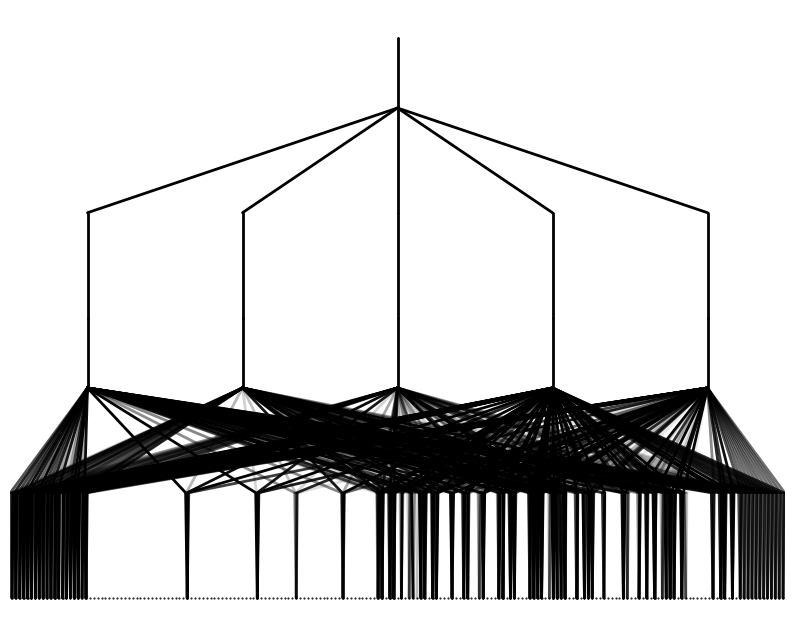

In [63]:
model(dataset['train_input']);
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])


In [64]:
image_folder="/tmp/pycharm_project_763/result/"
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc),save_fig=True, img_folder=image_folder)
import moviepy
import moviepy.video.io.ImageSequenceClip
import os
video_name = 'video'
fps = 10

files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))
train_index = np.sort(train_index)
# print(train_index)
image_files = [image_folder + '/' + str(train_index[index]) + '.jpg' for index in train_index]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_gif(video_name + '.gif')


| train_loss: 1.52e-01 | test_loss: 3.08e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:02<?, ?it/s]

ACC: 0.9878, AUC: 0.9987, SP: 0.9919, MCC: 0.9757, SN: 0.9838
ACC: 0.8913, AUC(test): 0.9362, SP: 0.8804, MCC: 0.7828, SN: 0.9022
cannot plot since data2 are not saved. Set save_act=True first.


IndexError: list index out of range

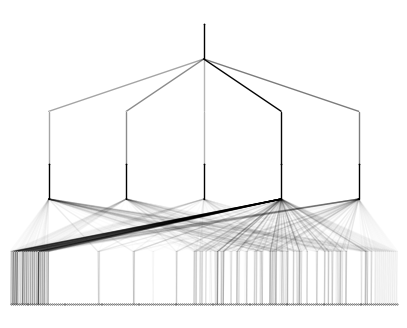

In [68]:
model.plot()

saving model version 0.4


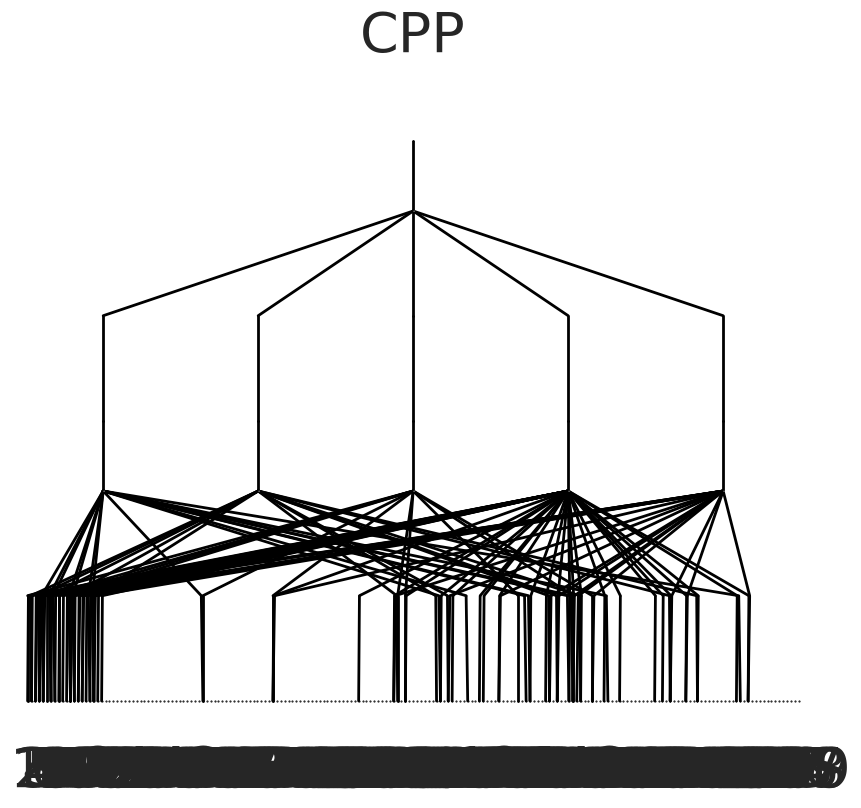

In [91]:
# 对整体的数据z-score 避免NaN  还没尝试 先修正再prune
model = model.prune()
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])

In [80]:
if  np.isnan(dataset['train_input']).any() or np.isinf(dataset['test_input']).any() : 
   print("数组中含有 NaN 或无穷大的值")

In [92]:
#最后一个特征有问题
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

| train_loss: 2.48e-01 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  20%|▏| 1/5 [00:03<00:12,  3.24s/it

ACC: 0.9284, AUC: 0.9821, SP: 0.9162, MCC: 0.8570, SN: 0.9405
ACC: 0.8641, AUC(test): 0.9321, SP: 0.8587, MCC: 0.7283, SN: 0.8696


| train_loss: 1.84e-01 | test_loss: 3.23e-01 | reg: 0.00e+00 | :  40%|▍| 2/5 [00:06<00:09,  3.07s/it

ACC: 0.9689, AUC: 0.9967, SP: 0.9595, MCC: 0.9380, SN: 0.9784
ACC: 0.8967, AUC(test): 0.9271, SP: 0.9022, MCC: 0.7935, SN: 0.8913


| train_loss: 1.61e-01 | test_loss: 3.31e-01 | reg: 0.00e+00 | :  60%|▌| 3/5 [00:09<00:06,  3.01s/it

ACC: 0.9770, AUC: 0.9984, SP: 0.9784, MCC: 0.9541, SN: 0.9757
ACC: 0.8913, AUC(test): 0.9224, SP: 0.8913, MCC: 0.7826, SN: 0.8913


| train_loss: 1.45e-01 | test_loss: 3.48e-01 | reg: 0.00e+00 | :  80%|▊| 4/5 [00:12<00:03,  3.02s/it

ACC: 0.9851, AUC: 0.9993, SP: 0.9838, MCC: 0.9703, SN: 0.9865
ACC: 0.8913, AUC(test): 0.9185, SP: 0.9130, MCC: 0.7833, SN: 0.8696


| train_loss: 1.35e-01 | test_loss: 3.57e-01 | reg: 2.10e+01 | : 100%|█| 5/5 [00:18<00:00,  3.66s/it

ACC: 0.9878, AUC: 0.9995, SP: 0.9892, MCC: 0.9757, SN: 0.9865
ACC: 0.8750, AUC(test): 0.9129, SP: 0.8696, MCC: 0.7500, SN: 0.8804
saving model version 0.5
0.9878378510475159 0.8695651888847351


saving model version 0.2


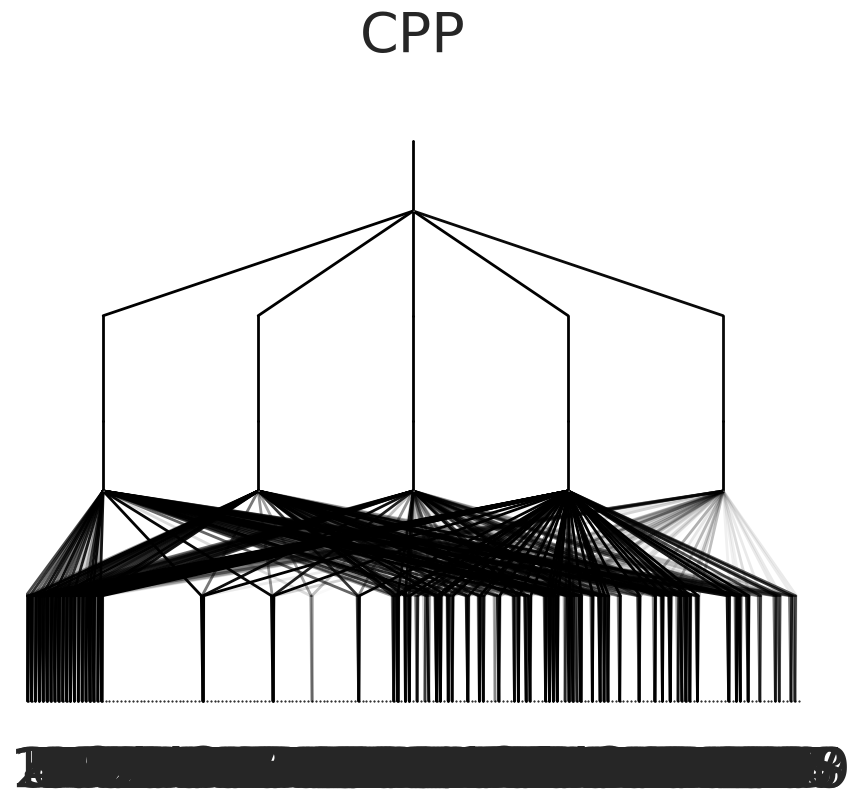

In [89]:
# 修正没问题
model = model.refine(10)
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])

In [90]:
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

| train_loss: 2.01e-01 | test_loss: 3.06e-01 | reg: 0.00e+00 | :  20%|▏| 1/5 [00:02<00:11,  2.79s/it

ACC: 0.9689, AUC: 0.9961, SP: 0.9703, MCC: 0.9378, SN: 0.9676
ACC: 0.9022, AUC(test): 0.9401, SP: 0.8913, MCC: 0.8045, SN: 0.9130


| train_loss: 1.58e-01 | test_loss: 3.20e-01 | reg: 0.00e+00 | :  40%|▍| 2/5 [00:05<00:08,  2.80s/it

ACC: 0.9851, AUC: 0.9990, SP: 0.9838, MCC: 0.9703, SN: 0.9865
ACC: 0.9076, AUC(test): 0.9282, SP: 0.9022, MCC: 0.8153, SN: 0.9130


| train_loss: 1.33e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  60%|▌| 3/5 [00:07<00:05,  2.59s/it

ACC: 0.9932, AUC: 0.9999, SP: 0.9946, MCC: 0.9865, SN: 0.9919
ACC: 0.8913, AUC(test): 0.9309, SP: 0.8913, MCC: 0.7826, SN: 0.8913


| train_loss: 1.11e-01 | test_loss: 3.25e-01 | reg: 0.00e+00 | :  80%|▊| 4/5 [00:10<00:02,  2.59s/it

ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000
ACC: 0.8859, AUC(test): 0.9336, SP: 0.8804, MCC: 0.7718, SN: 0.8913


| train_loss: 9.53e-02 | test_loss: 3.27e-01 | reg: 4.15e+01 | : 100%|█| 5/5 [00:16<00:00,  3.27s/it

ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000
ACC: 0.8750, AUC(test): 0.9335, SP: 0.8804, MCC: 0.7500, SN: 0.8696
saving model version 0.3
1.0 0.8695651888847351


fixing (0,0,0) with 0
fixing (0,0,1) with x, r2=0.8073257207870483, c=1
fixing (0,0,2) with x, r2=0.7726001143455505, c=1
fixing (0,0,3) with x, r2=0.012177565135061741, c=1
fixing (0,0,4) with x, r2=0.4639022648334503, c=1
fixing (0,1,0) with x, r2=0.021107731387019157, c=1
fixing (0,1,1) with x, r2=0.6543233394622803, c=1
fixing (0,1,2) with x, r2=0.6154491901397705, c=1
fixing (0,1,3) with 0
fixing (0,1,4) with x, r2=0.2076256275177002, c=1
fixing (0,2,0) with 0
fixing (0,2,1) with x, r2=0.9136815667152405, c=1
fixing (0,2,2) with 0
fixing (0,2,3) with x, r2=0.052707742899656296, c=1
fixing (0,2,4) with x, r2=0.9773017168045044, c=1
fixing (0,3,0) with x, r2=0.7842553853988647, c=1
fixing (0,3,1) with x^2, r2=0.997707188129425, c=2
fixing (0,3,2) with 0
fixing (0,3,3) with x, r2=0.7112997770309448, c=1
fixing (0,3,4) with x, r2=0.73753821849823, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with x, r2=0.6773949265480042, c=1
fixing (0,4,2) with 0
fixing (0,4,3) with x, r2=0.1345877349376

KeyboardInterrupt: 

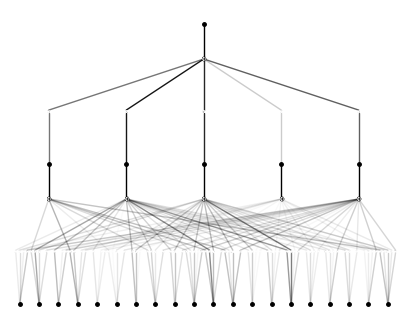

In [84]:
model.plot()
mode = "auto"  # "manual"
"""
假设在一个神经网络模型中，坐标 (0,36,4) 可能表示：

层索引 (0): 第一层或第一个处理阶段。
单元索引 (36): 第一层中的第 37 个单元（因为索引从 0 开始）。
通道或特征索引 (4): 第 5 个通道或特征
"""

if mode == "manual":
    # manual mode
    model.fix_symbolic(0, 0, 0, 'sin');
    model.fix_symbolic(0, 1, 0, 'x^2');
    model.fix_symbolic(1, 0, 0, 'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
    model.auto_symbolic(lib=lib)

In [ ]:

from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0], 4)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.datasets import make_classification
#以下代码是一个3层的
# 生成一个示例数据集
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义MLP模型
mlp = MLPClassifier(max_iter=1000)

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,), (40,), (50,), (60,), (70,), (80,),(90,),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print(f"Best parameters: {grid_search.best_params_}")

train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# 计算混淆矩阵
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Sensitivity (SP)
    sensitivity = tp / (tp + fn)
    # Specificity (SE)
    specificity = tn / (tn + fp)
    # MCC
    mcc = matthews_corrcoef(y_true, y_pred)
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return sensitivity, specificity, mcc, accuracy

# 训练集评估
train_sensitivity, train_specificity, train_mcc, train_accuracy = calculate_metrics(y_train, train_preds)
print(f"Training Sensitivity (SP): {train_sensitivity:.4f}")
print(f"Training Specificity (SE): {train_specificity:.4f}")
print(f"Training MCC: {train_mcc:.4f}")
print(f"Training Accuracy (ACC): {train_accuracy:.4f}")

# 测试集评估
test_sensitivity, test_specificity, test_mcc, test_accuracy = calculate_metrics(y_test, test_preds)
print(f"Test Sensitivity (SP): {test_sensitivity:.4f}")
print(f"Test Specificity (SE): {test_specificity:.4f}")
print(f"Test MCC: {test_mcc:.4f}")
print(f"Test Accuracy (ACC): {test_accuracy:.4f}")

# AUC计算
test_probs = grid_search.predict_proba(X_test)[:, 1]
train_probs = grid_search.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.datasets import make_classification
#以下代码是一个3层的
# 生成一个示例数据集
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义MLP模型
mlp = MLPClassifier(max_iter=1000)

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,30), (40,40), (50,50), (60,60), (70,70), (80,80),(90,90),(100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print(f"Best parameters: {grid_search.best_params_}")

train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# 计算混淆矩阵
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Sensitivity (SP)
    sensitivity = tp / (tp + fn)
    # Specificity (SE)
    specificity = tn / (tn + fp)
    # MCC
    mcc = matthews_corrcoef(y_true, y_pred)
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return sensitivity, specificity, mcc, accuracy

# 训练集评估
train_sensitivity, train_specificity, train_mcc, train_accuracy = calculate_metrics(y_train, train_preds)
print(f"Training Sensitivity (SP): {train_sensitivity:.4f}")
print(f"Training Specificity (SE): {train_specificity:.4f}")
print(f"Training MCC: {train_mcc:.4f}")
print(f"Training Accuracy (ACC): {train_accuracy:.4f}")

# 测试集评估
test_sensitivity, test_specificity, test_mcc, test_accuracy = calculate_metrics(y_test, test_preds)
print(f"Test Sensitivity (SP): {test_sensitivity:.4f}")
print(f"Test Specificity (SE): {test_specificity:.4f}")
print(f"Test MCC: {test_mcc:.4f}")
print(f"Test Accuracy (ACC): {test_accuracy:.4f}")

# AUC计算
test_probs = grid_search.predict_proba(X_test)[:, 1]
train_probs = grid_search.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
import pandas

protein_list = []
with open('/tmp/pycharm_project_763/model/sequence_test.txt', 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys

with open('/tmp/pycharm_project_763/model/maccs_fp_test.txt', 'w') as f:
    for seq in protein_list:
        peptide = Chem.MolToSmiles(Chem.MolFromFASTA(seq))
        peptide_smiles = Chem.MolFromFASTA(seq)
        if peptide_smiles is None:
            raise ValueError("SMILES字符串无效，无法转换为Mol对象")
        print(type(peptide_smiles))
        maccs_fp = MACCSkeys.GenMACCSKeys(peptide_smiles)
        # print(' '.join(list(maccs_fp)))
        print(' '.join(map(str, list(maccs_fp))))
        maccs_fp = ' '.join(map(str, list(maccs_fp)))
        # f.write(peptide+'\t'+str(maccs_fp)+'\n')
        f.write(maccs_fp + '\n')
print()